# Carregamento dos Dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
base_cars_completa = pd.read_csv('cars.csv', sep=',')
base_cars_completa

<ipython-input-2-e1e0ee448cd5>:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  base_cars_completa = pd.read_csv('cars.csv', sep=',')


,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,NaN,0.0,1.0,1.0,Apple Tree Acura,NaN,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,NaN,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762086,Volvo,S60 B5 Momentum,2022,22877.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,25-33,Bright Silver Metallic,Blond,0.0,1.0,0.0,Volvo Cars Danbury,4.2,4.2,2.0,250.0,34798.0
762087,Volvo,S60 T5,2012,72900.0,250.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,A/T,Front-wheel Drive,Gasoline,NaN,Red,Beige,NaN,NaN,NaN,NaN,NaN,4.5,101.0,NaN,12500.0
762088,Volvo,S60 T5,2014,92000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,Front-wheel Drive,Gasoline,21-30,Ice White,Soft Beige,0.0,0.0,1.0,Dapper Car Sales,NaN,4.8,36.0,300.0,12299.0
762089,Volvo,S60 T5 Platinum,2013,132000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,All-wheel Drive,Gasoline,20-29,Ice White,Off Black,1.0,0.0,0.0,Legend Auto Sales Inc.,4.6,4.7,62.0,1000.0,8995.0


In [ ]:

# definindo uma semente aletória porém fixa para que os resultados sejam o mesmo sempre que o código for executado
np.random.seed(42)

# Calcula o tamanho da amostra correspondente a 25% do conjunto de dados  - Cerca de 190mil registros
sample_size = int(0.25 * len(base_cars_completa))

# Gera uma amostra aleatória de índices utilizando o parâmetro de 25%
random_indices = np.random.choice(base_cars_completa.index, size=sample_size, replace=False)

# Cria o dataframe da amostragem aleatória
amostra_carros1 = base_cars_completa.loc[random_indices]
amostra_carros1

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
7532,Acura,TLX V6 w/Technology Package,2019,48266.0,3.5L V6 24V GDI SOHC,9-Speed Automatic,All-wheel Drive,Gasoline,20-29,Platinum White Pearl,Parchment,1.0,1.0,1.0,White Bear Subaru,4.7,4.4,56.0,1000.0,28995.0
336281,Honda,Insight EX,2022,5026.0,1.5L I4 16V MPFI DOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,55-49,White,NaN,0.0,1.0,1.0,Auto Expo 95,NaN,NaN,0.0,2746.0,31995.0
266023,Ford,Mustang EcoBoost,2018,45148.0,"EcoBoost 2.3L I-4 gasoline direct injection, D...",Manual,Rear-wheel Drive,Gasoline,20-28,Ruby Red,Ebony,0.0,0.0,1.0,LAX Chrysler Dodge Jeep RAM,4.8,4.8,192.0,150.0,20350.0
224994,Ford,Expedition EL Limited,2014,160899.0,5.4L V8 24V MPFI SOHC Flexible Fuel,6-Speed Automatic,Four-wheel Drive,E85 Flex Fuel,13-18,Ruby Red Metallic Tinted Clearcoat,Stone,0.0,0.0,1.0,The Bear Lot,NaN,4.5,14.0,600.0,16992.0
132622,Chevrolet,Blazer RS,2019,26245.0,3.6L V6 24V GDI DOHC,9-Speed Automatic,Front-wheel Drive,Gasoline,20-26,Black,Jet Black,1.0,0.0,0.0,Schwieters Chevrolet of Willmar,3.8,4.4,118.0,NaN,34999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407970,Jeep,Renegade Latitude,2016,142126.0,2.4L I4 16V MPFI SOHC,9-Speed Automatic,Four-wheel Drive,Gasoline,24-31,Granite Crystal Clearcoat Metallic,Black,0.0,1.0,1.0,Al Serra Auto Plaza,4.5,4.4,187.0,500.0,11500.0
263449,Ford,Mustang LX 5.0L Sport,1990,100514.0,5.0L V8 16V OHV,Automatic with Overdrive,Rear-wheel Drive,Gasoline,NaN,Deep Emerald Green Clearcoat Metallic,White,0.0,0.0,0.0,Paul Sevag Motors Inc.,5.0,4.7,5.0,2250.0,18500.0
640581,Subaru,Impreza Base,2020,44723.0,2.0L DOHC,CVT Lineartronic,NaN,NaN,NaN,Black,black,0.0,1.0,1.0,Doug Smith Subaru,NaN,4.7,34.0,NaN,20427.0
34845,BMW,330 i xDrive,2017,36795.0,2.0L,8-Speed Automatic,All-wheel Drive,Gasoline,23-33,Jet Black,Black,0.0,0.0,1.0,Deery Brothers of Dubuque,NaN,4.8,41.0,141.0,24999.0


In [ ]:
amostra_carros1.columns

Index(['manufacturer', 'model', 'year', 'mileage', 'engine', 'transmission',
       'drivetrain', 'fuel_type', 'mpg', 'exterior_color', 'interior_color',
       'accidents_or_damage', 'one_owner', 'personal_use_only', 'seller_name',
       'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop',
       'price'],
      dtype='object')

manufacturer            object
model                   object
year                     int64
mileage                float64
engine                  object
transmission            object
drivetrain              object
fuel_type               object
mpg                     object
exterior_color          object
interior_color          object
accidents_or_damage    float64
one_owner              float64
personal_use_only      float64
seller_name             object
seller_rating          float64
driver_rating          float64
driver_reviews_num     float64
price_drop             float64
price                   object
dtype: object


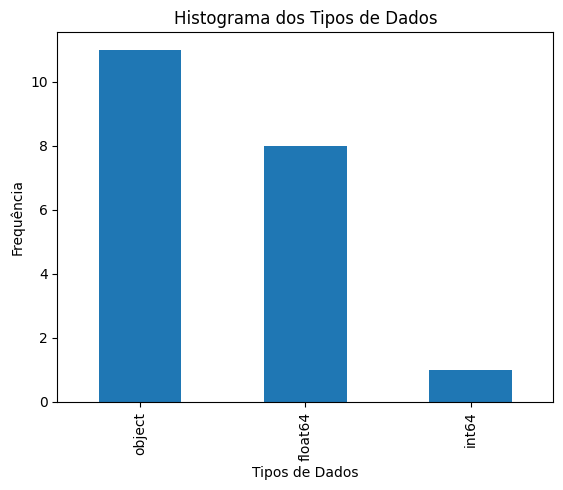

In [ ]:
# Exibir os tipos de dados no dataframe
print(amostra_carros1.dtypes)

amostra_carros1.dtypes.value_counts().plot(kind='bar')
plt.title('Histograma dos Tipos de Dados')
plt.xlabel('Tipos de Dados')
plt.ylabel('Frequência')
plt.show()

In [ ]:
amostra_carros1.nunique()

,0
manufacturer,30
model,7946
year,90
mileage,99423
engine,3958
transmission,709
drivetrain,28
fuel_type,22
mpg,626
exterior_color,4683


In [ ]:
amostra_carros1.describe(include='all') #lembrando que é usado para gerar estatísticas descrtivias resumidas para colunas numéricas, por isso o parâmetro all foi colocado, para categóricos alguns valores serão como nulo.

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
count,190522,190522,190522.000000,190401.000000,186773,188029,185122,184780,154680,188184,176289,184419.00000,182582.000000,184250.000000,188324,136950.000000,182526.000000,190522.000000,102390.000000,190522.0
unique,30,7946,NaN,NaN,3958,709,28,22,626,4683,2691,NaN,NaN,NaN,17029,NaN,NaN,NaN,NaN,40057.0
top,Ford,Fusion SE,NaN,NaN,2.0L I4 16V GDI DOHC Turbo,6-Speed Automatic,Front-wheel Drive,Gasoline,18-25,Black,Black,NaN,NaN,NaN,Gateway Classic Cars,NaN,NaN,NaN,NaN,19995.0
freq,20000,777,NaN,NaN,18665,36962,60198,161182,3900,14914,71670,NaN,NaN,NaN,417,NaN,NaN,NaN,NaN,763.0
mean,NaN,NaN,2017.784838,55843.199883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.22835,0.562323,0.656787,NaN,4.157958,4.623342,89.393655,1009.447534,NaN
std,NaN,NaN,5.134599,43536.120750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.41977,0.496102,0.474783,NaN,0.807811,0.277739,114.755494,1363.028633,NaN
min,NaN,NaN,1923.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,0.000000,NaN,1.000000,1.000000,0.000000,100.000000,NaN
25%,NaN,NaN,2016.000000,23296.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,0.000000,NaN,3.800000,4.500000,13.000000,378.000000,NaN
50%,NaN,NaN,2019.000000,45737.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,1.000000,1.000000,NaN,4.500000,4.700000,51.000000,643.000000,NaN
75%,NaN,NaN,2021.000000,78474.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,1.000000,1.000000,NaN,4.700000,4.800000,119.000000,1010.000000,NaN


In [ ]:
amostra_carros1.isnull().sum()

,0
manufacturer,0
model,0
year,0
mileage,121
engine,3749
transmission,2493
drivetrain,5400
fuel_type,5742
mpg,35842
exterior_color,2338


In [ ]:
print(amostra_carros1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 190522 entries, 7532 to 443935
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manufacturer         190522 non-null  object 
 1   model                190522 non-null  object 
 2   year                 190522 non-null  int64  
 3   mileage              190401 non-null  float64
 4   engine               186773 non-null  object 
 5   transmission         188029 non-null  object 
 6   drivetrain           185122 non-null  object 
 7   fuel_type            184780 non-null  object 
 8   mpg                  154680 non-null  object 
 9   exterior_color       188184 non-null  object 
 10  interior_color       176289 non-null  object 
 11  accidents_or_damage  184419 non-null  float64
 12  one_owner            182582 non-null  float64
 13  personal_use_only    184250 non-null  float64
 14  seller_name          188324 non-null  object 
 15  seller_rating      

# Visualização dos Dados/Tratamento de Dados (EDA)

In [ ]:
# Visualização de variáveis categóricas e numéricas:
# Pergunta 2

var_num = amostra_carros1.select_dtypes(include=['int64', 'float64']).columns
var_cat = amostra_carros1.select_dtypes(include=['object']).columns

print("\nVariáveis Numéricas:")
print(var_num)

print("\nVariáveis Categóricas:")
print(var_cat)


Variáveis Numéricas:
Index(['year', 'mileage', 'accidents_or_damage', 'one_owner',
       'personal_use_only', 'seller_rating', 'driver_rating',
       'driver_reviews_num', 'price_drop'],
      dtype='object')

Variáveis Categóricas:
Index(['manufacturer', 'model', 'engine', 'transmission', 'drivetrain',
       'fuel_type', 'mpg', 'exterior_color', 'interior_color', 'seller_name',
       'price'],
      dtype='object')


In [ ]:
print("\nVariância:")
print(amostra_carros1[var_num].var())


Variância:
year                   2.636411e+01
mileage                1.895394e+09
accidents_or_damage    1.762070e-01
one_owner              2.461172e-01
personal_use_only      2.254191e-01
seller_rating          6.525590e-01
driver_rating          7.713884e-02
driver_reviews_num     1.316882e+04
price_drop             1.857847e+06
dtype: float64


In [ ]:
print("\nDesvio Padrão:")
print(amostra_carros1[var_num].std())


Desvio Padrão:
year                       5.134599
mileage                43536.120750
accidents_or_damage        0.419770
one_owner                  0.496102
personal_use_only          0.474783
seller_rating              0.807811
driver_rating              0.277739
driver_reviews_num       114.755494
price_drop              1363.028633
dtype: float64


In [ ]:
# Valores únicos e frequências para cada variável categórica
for col in var_cat:
    print(f"\nValores únicos em {col}:")
    print(amostra_carros1[col].value_counts())


Valores únicos em manufacturer:
manufacturer
Ford             20000
Toyota           14794
Chevrolet        13911
Nissan           12133
Jeep             10479
Mercedes-Benz    10169
BMW               9383
Honda             9259
Kia               8733
GMC               7439
Dodge             6292
Subaru            6185
Volkswagen        6124
Hyundai           5554
Lexus             5388
RAM               4843
Cadillac          4552
Audi              4462
Mazda             3938
Buick             3671
Chrysler          3206
Land Rover        3116
INFINITI          3061
Porsche           2916
Lincoln           2604
Volvo             2571
Acura             2020
Tesla             1451
Mitsubishi        1439
Jaguar             829
Name: count, dtype: int64

Valores únicos em model:
model
Fusion SE                           777
Sentra SV                           707
Sportage LX                         684
Corolla LE                          674
GLC 300 Base 4MATIC                 674
      

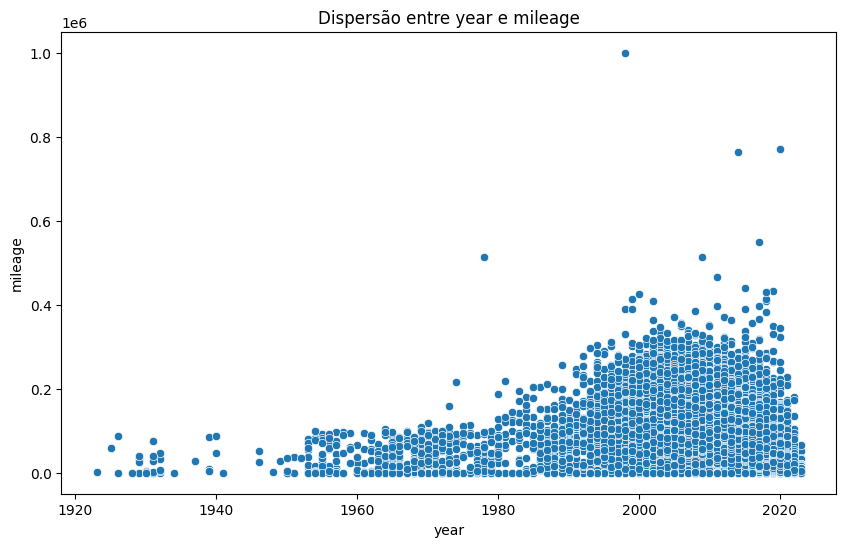

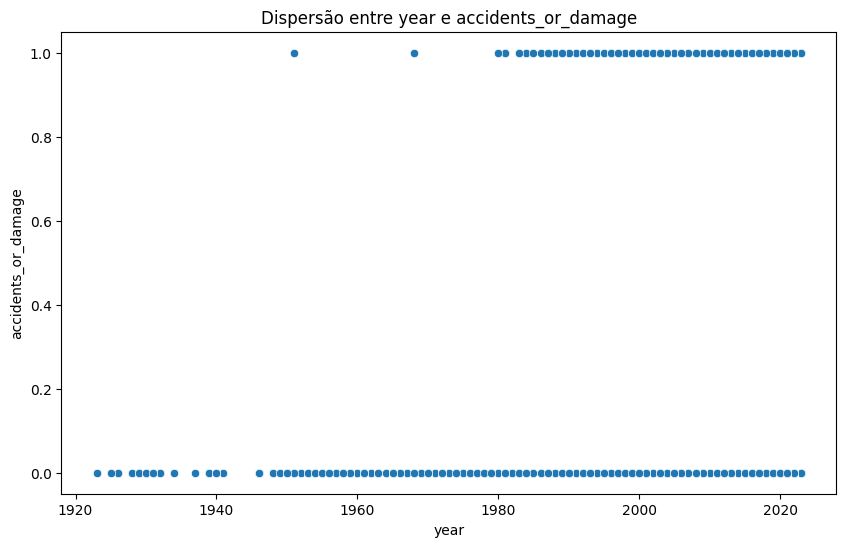

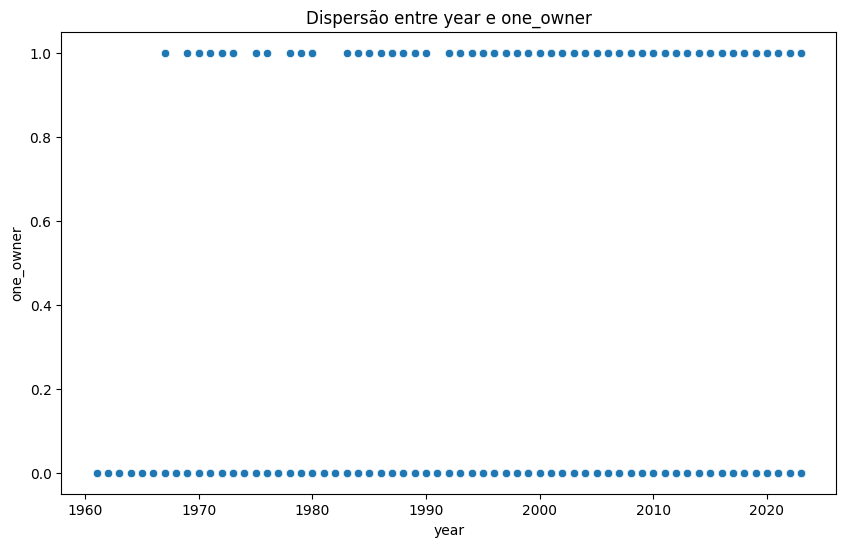

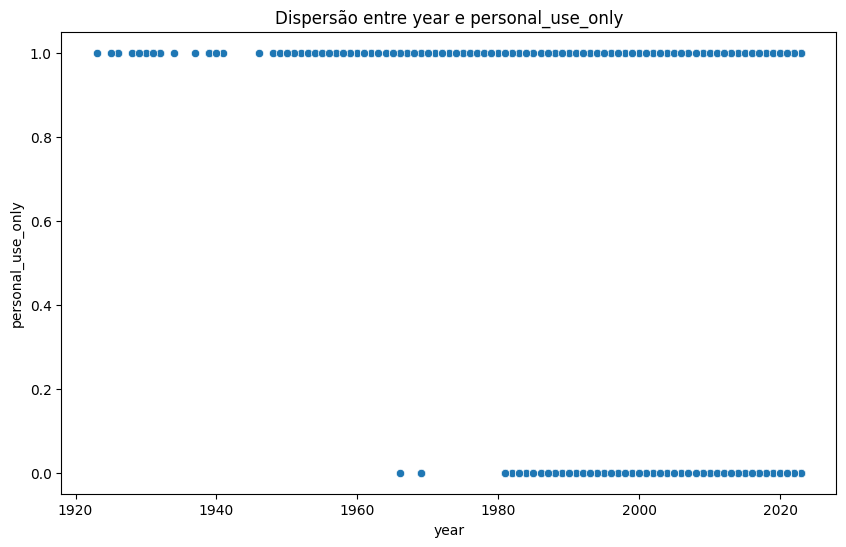

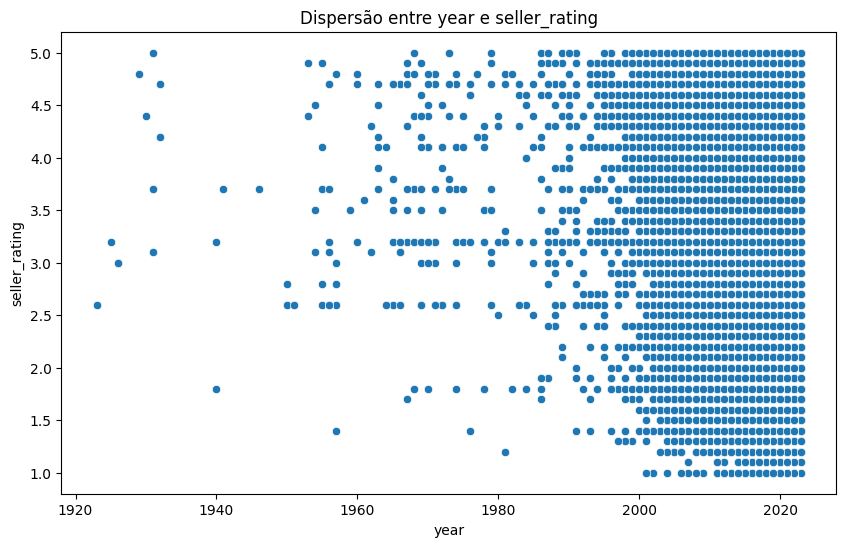

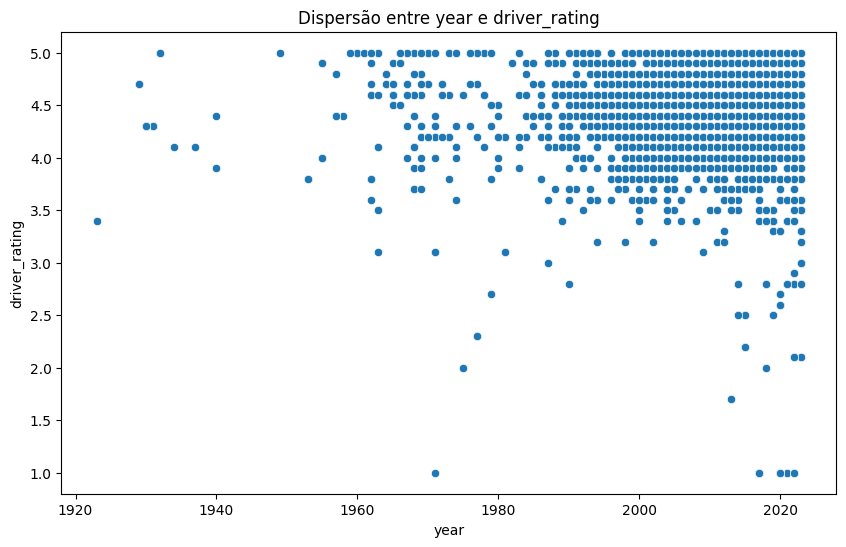

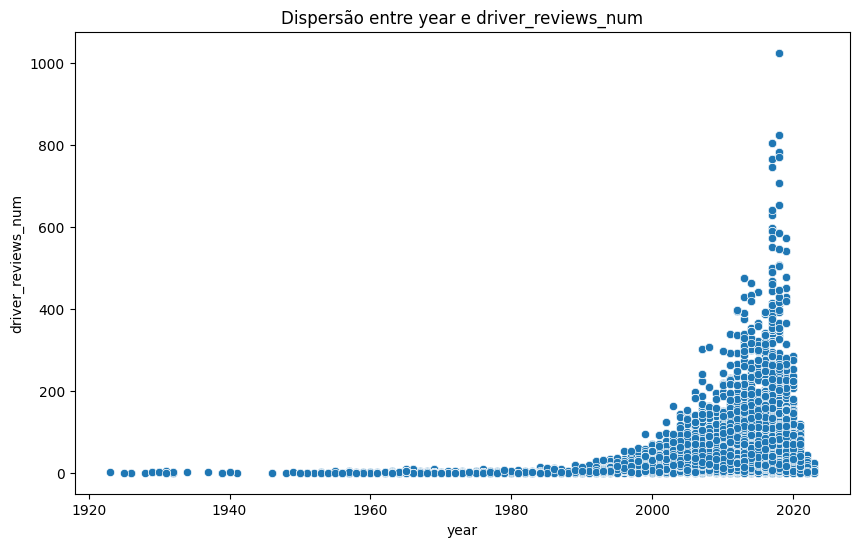

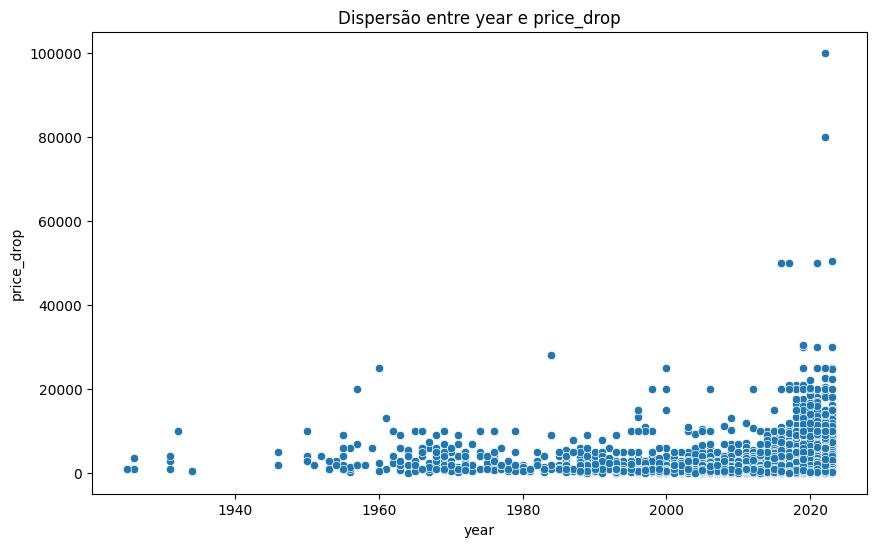

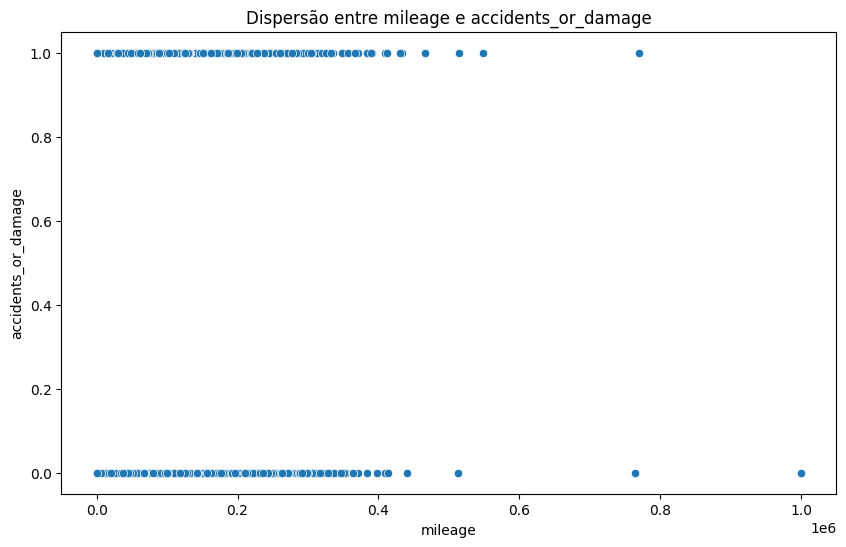

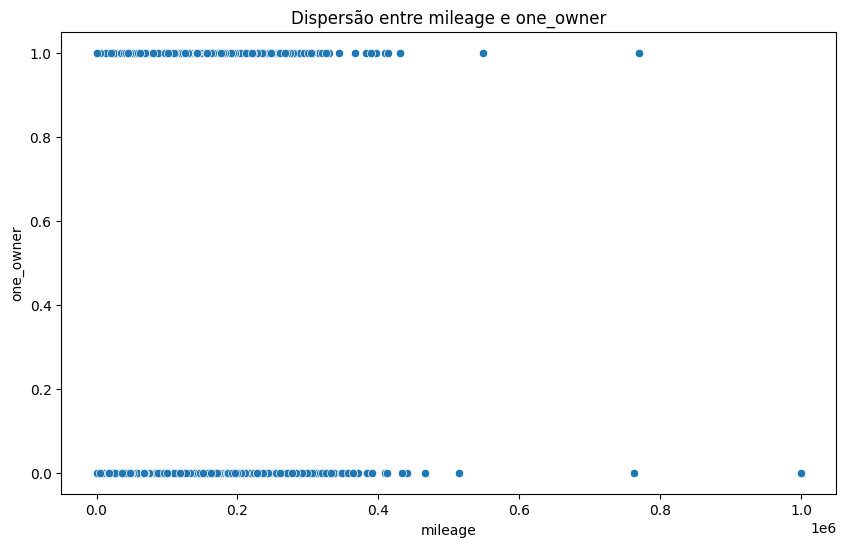

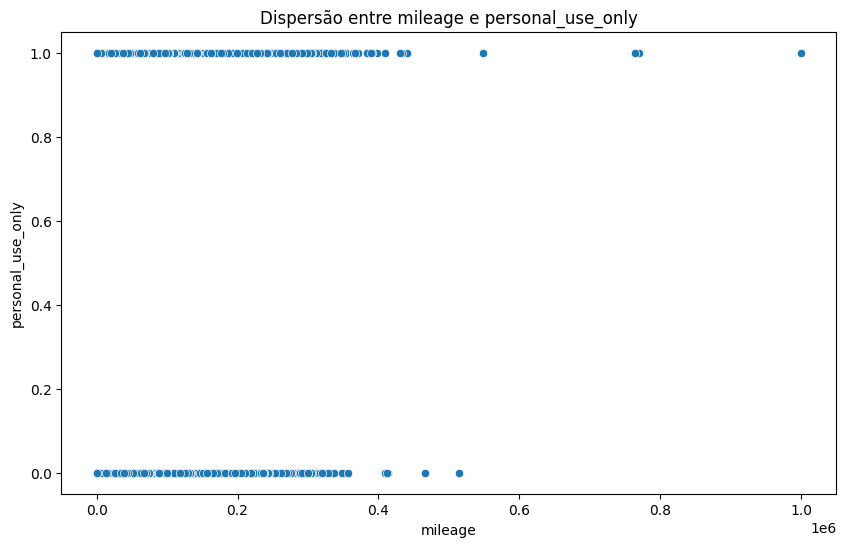

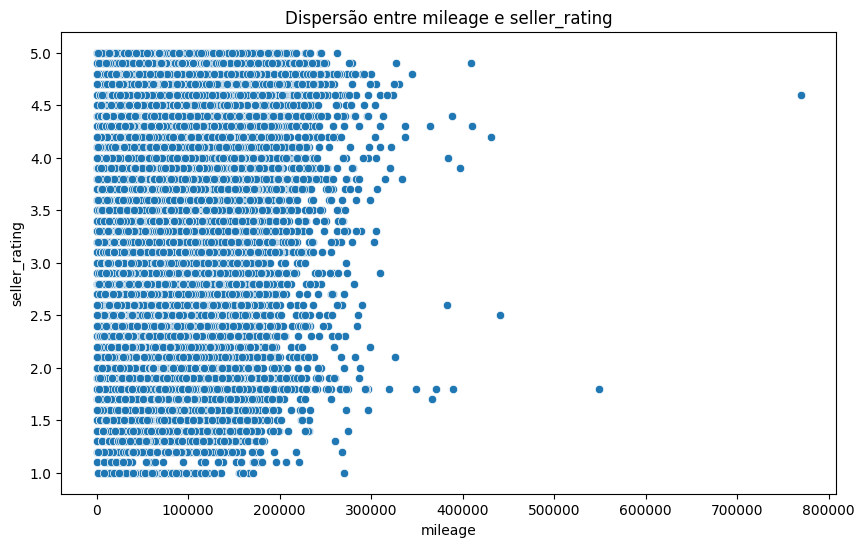

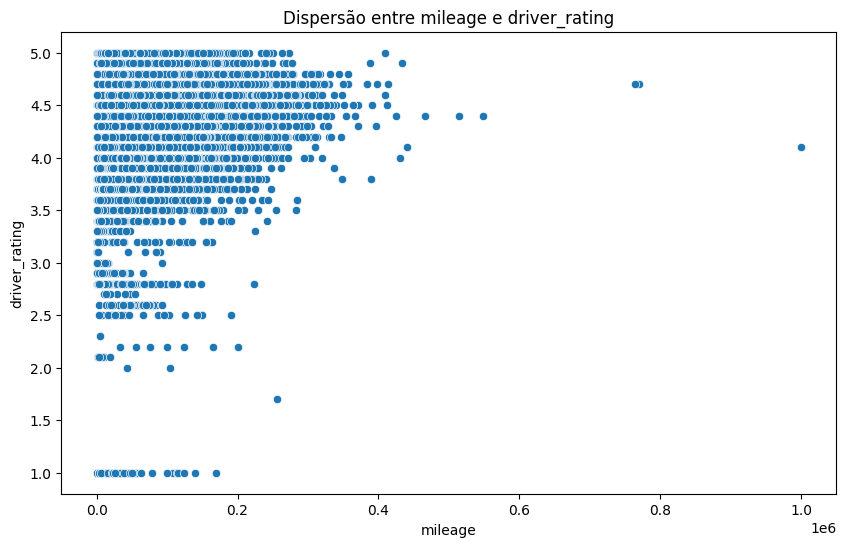

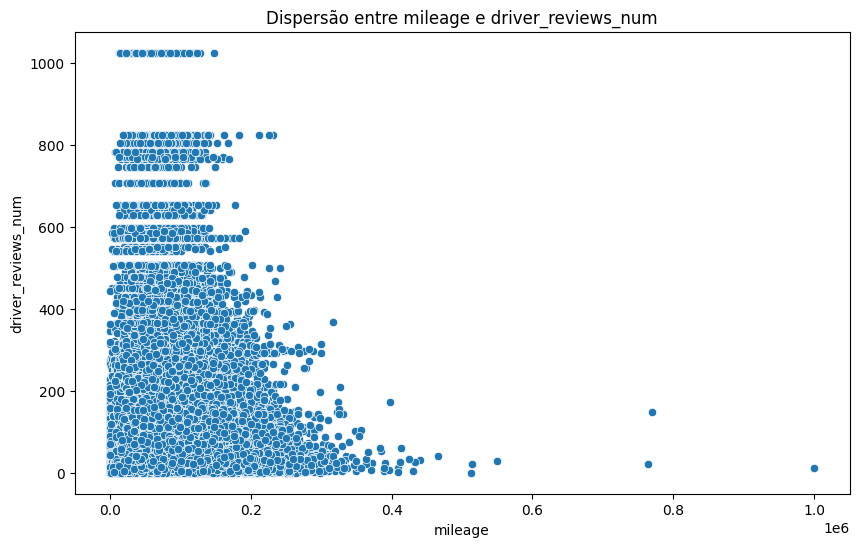

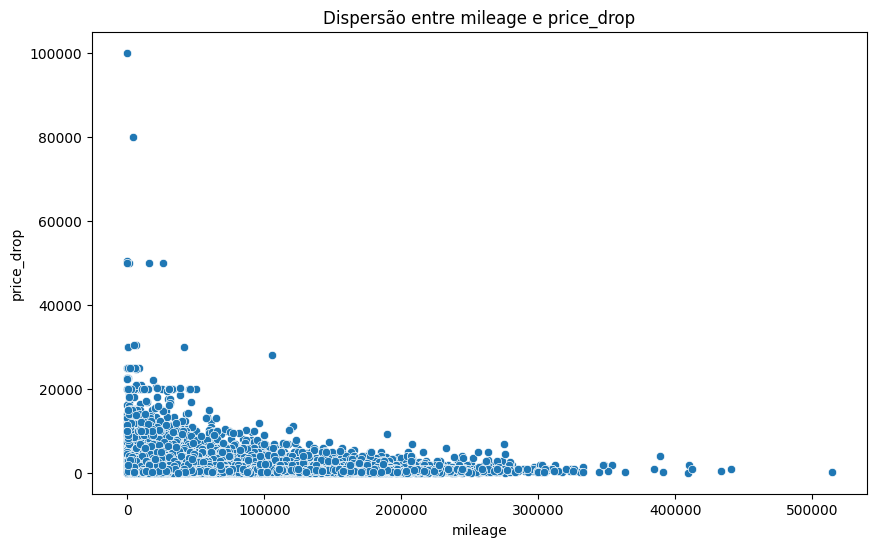

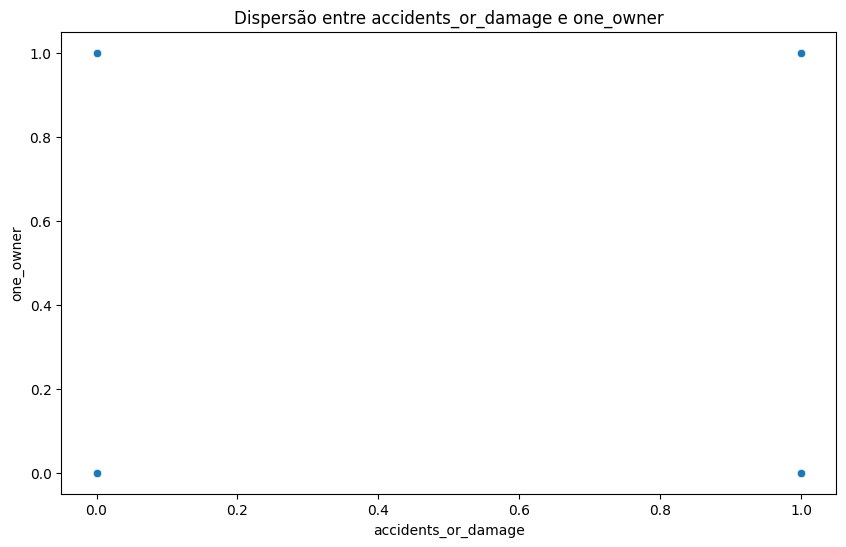

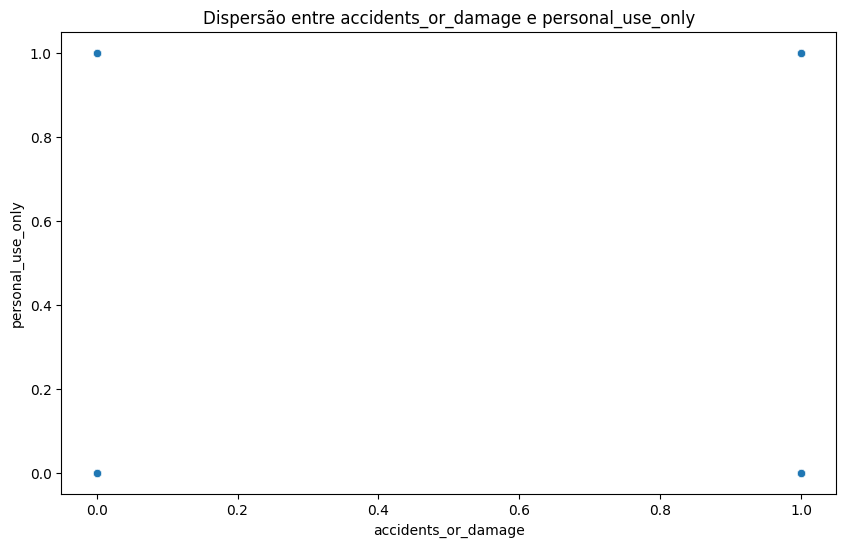

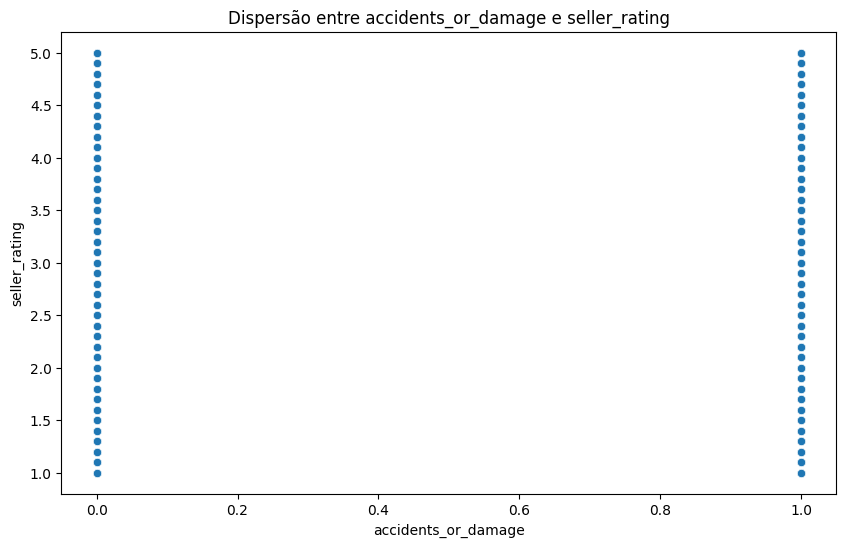

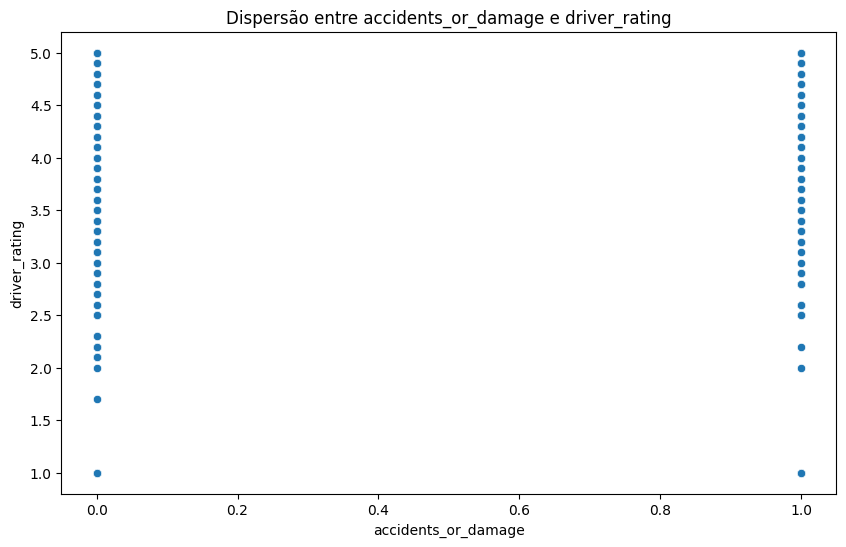

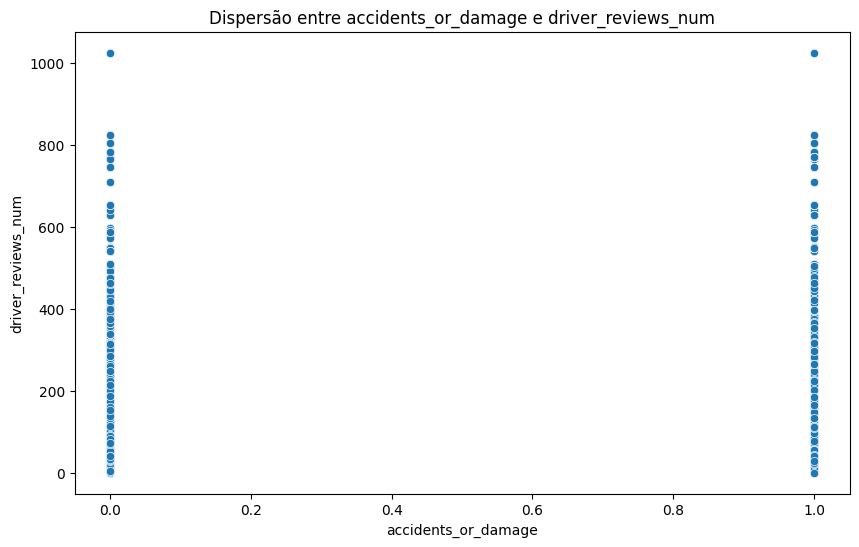

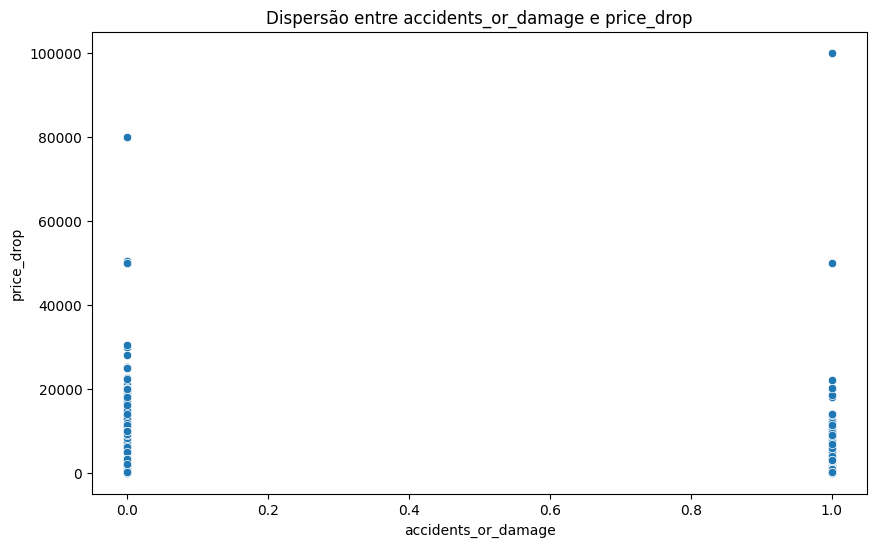

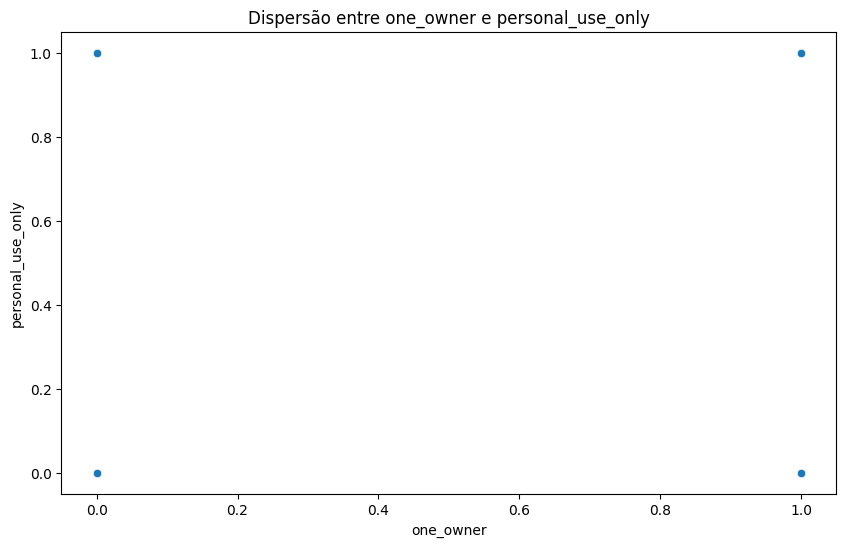

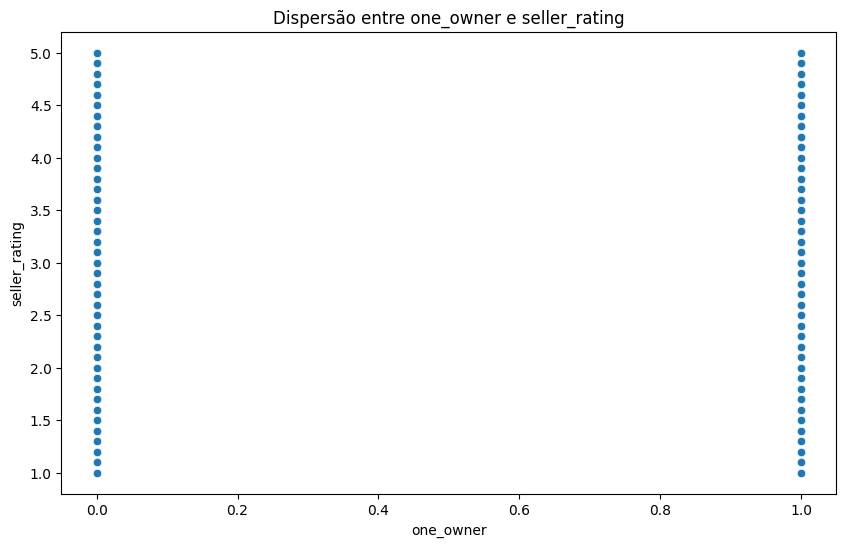

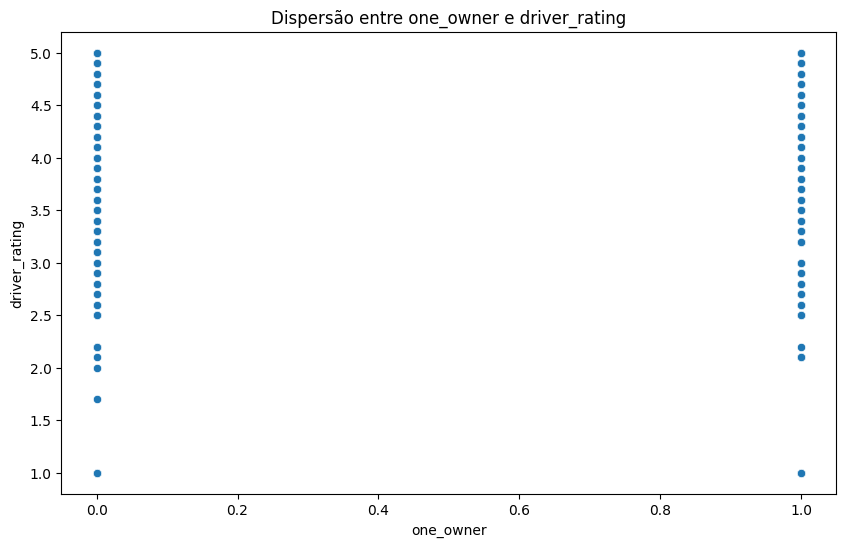

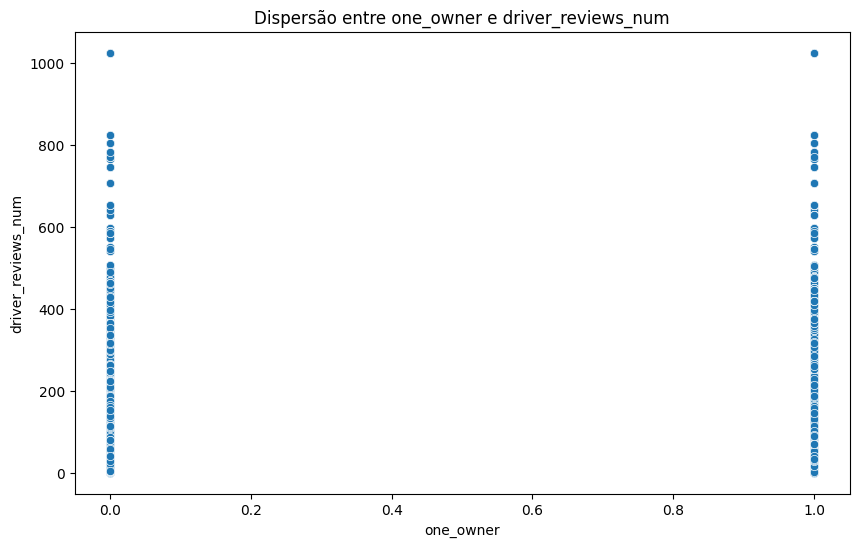

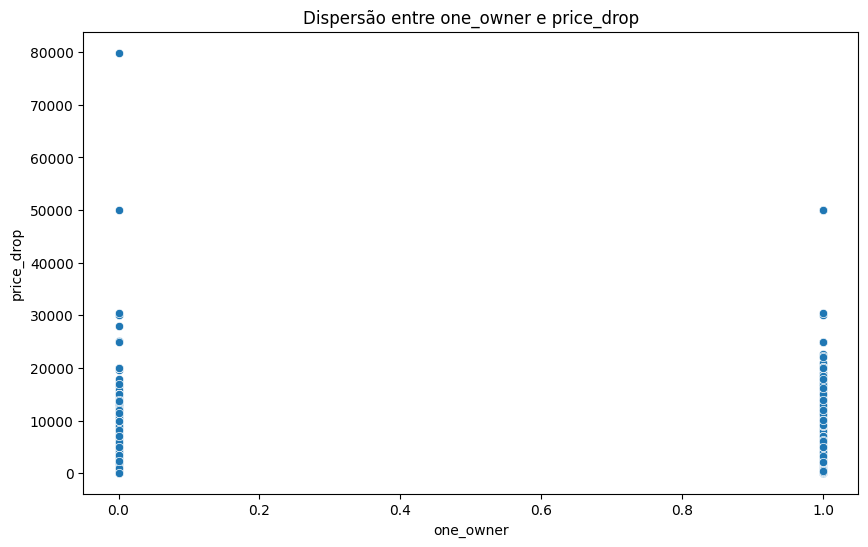

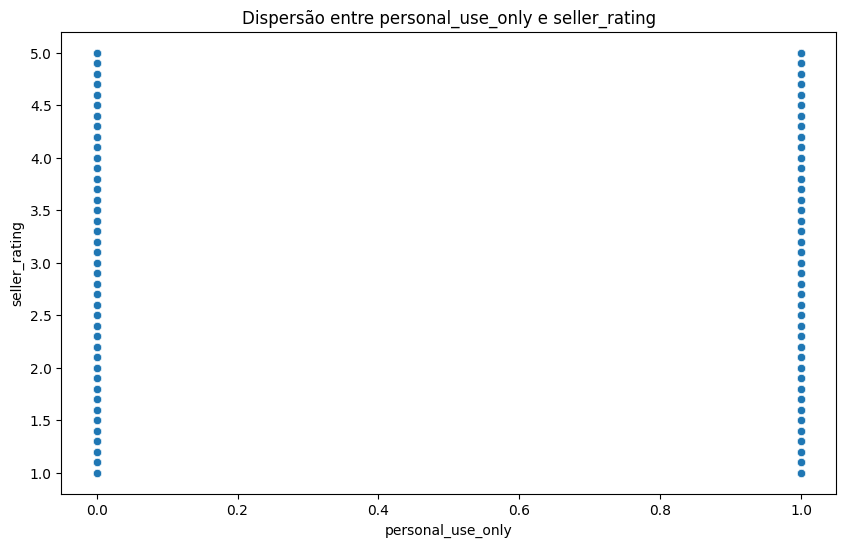

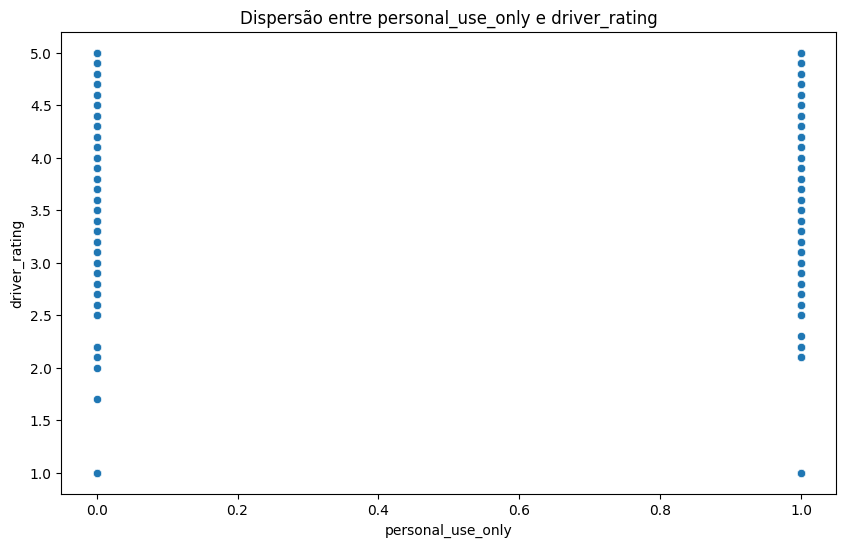

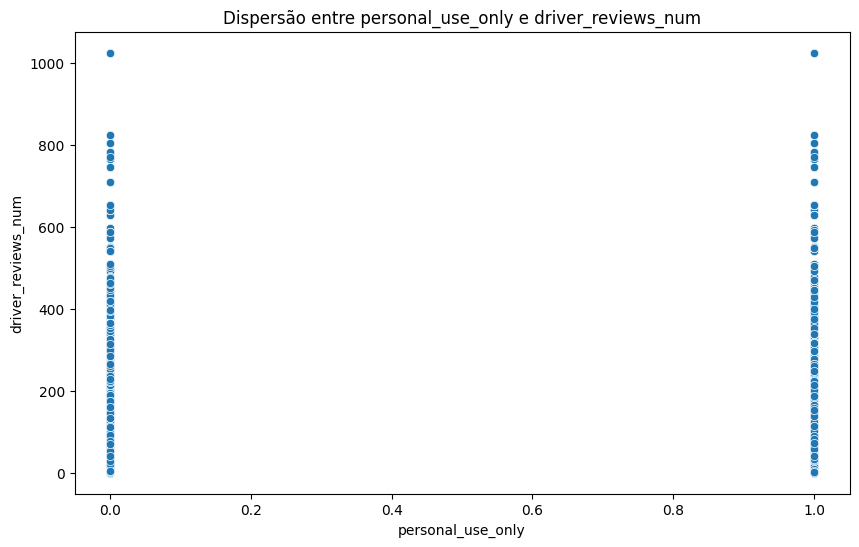

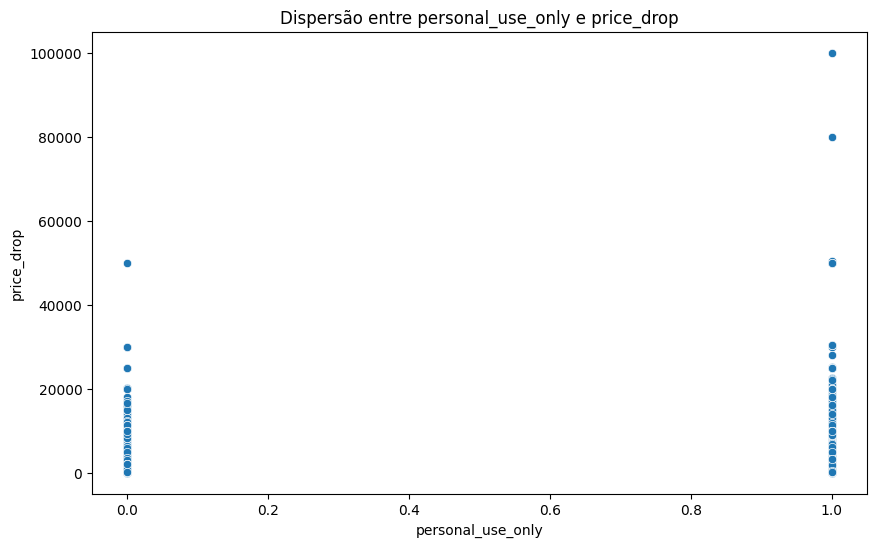

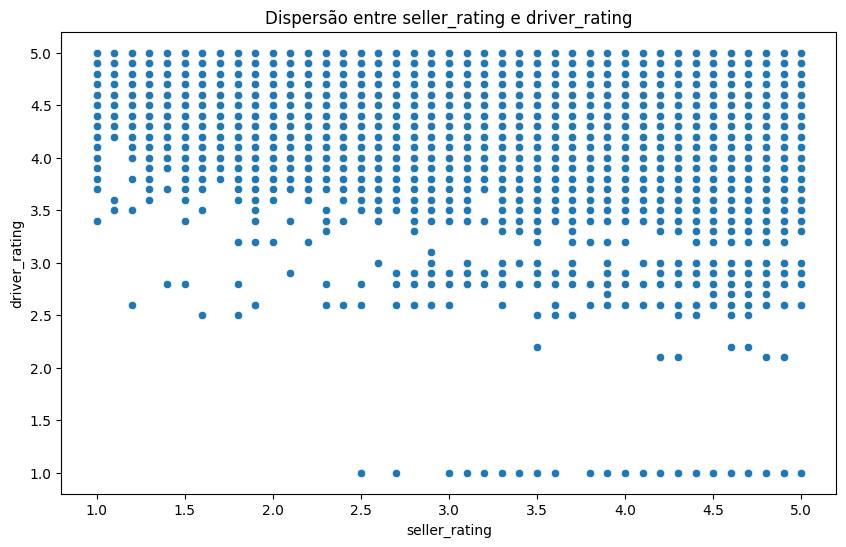

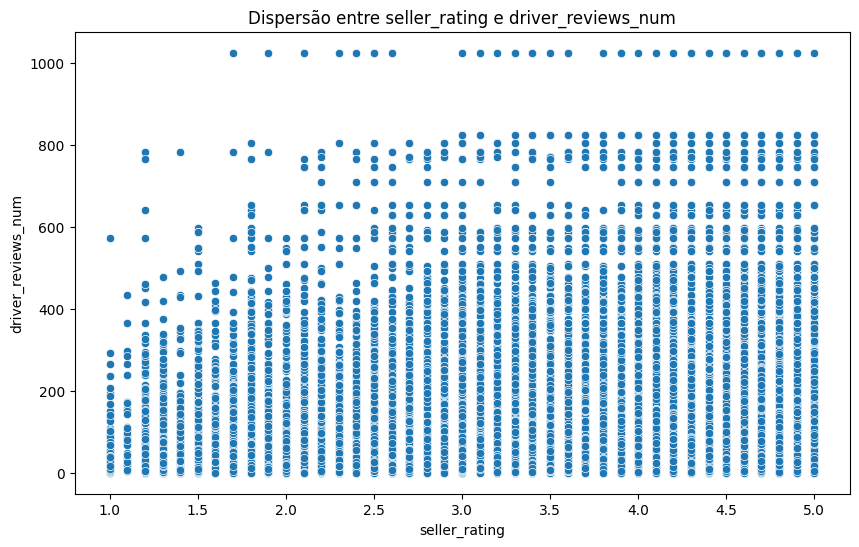

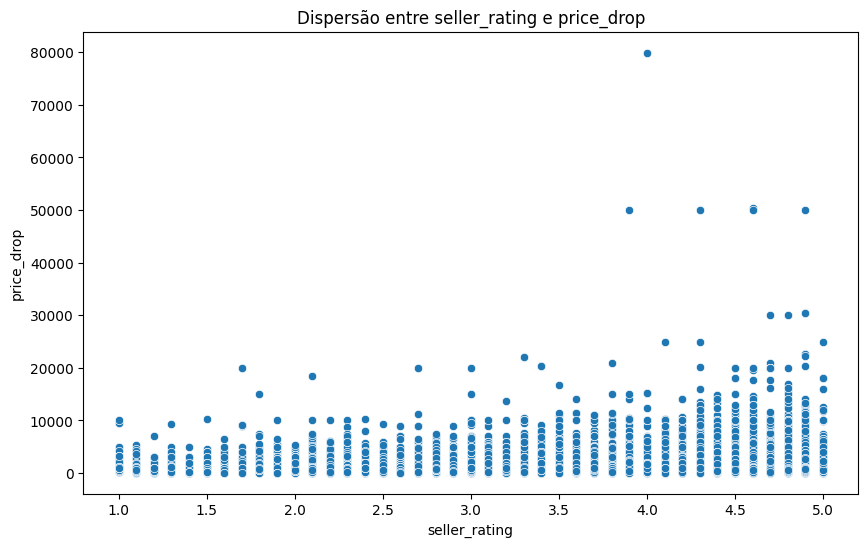

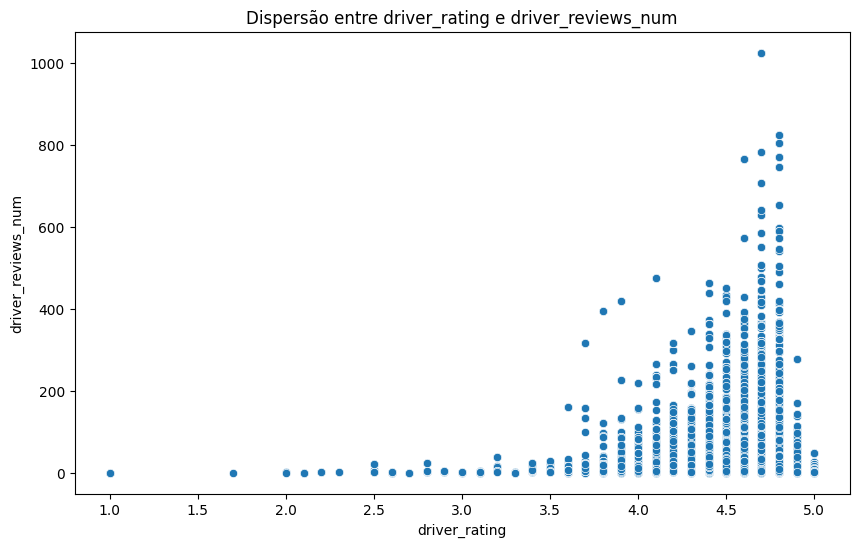

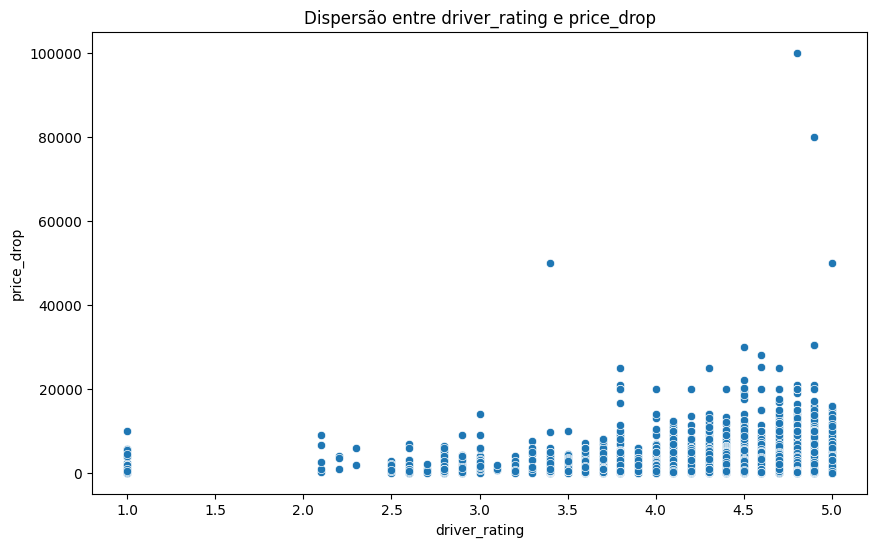

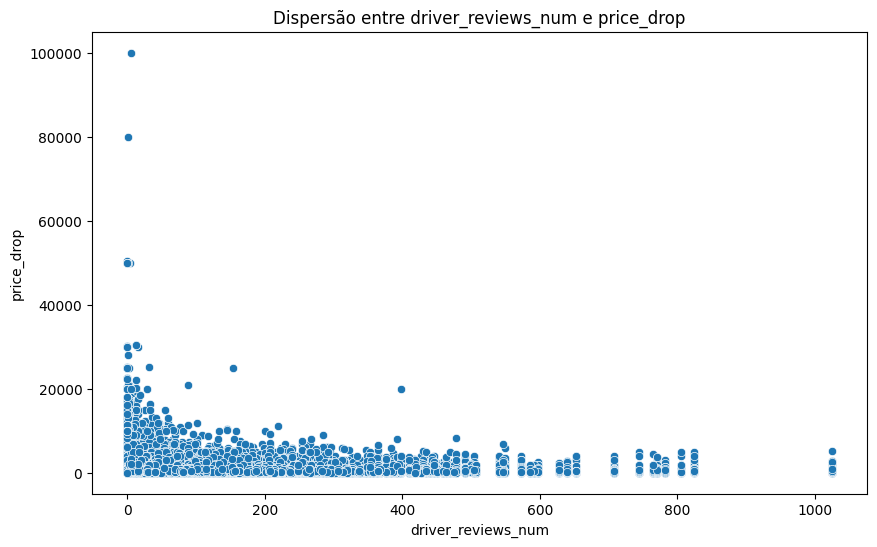

In [ ]:
for i, num_col1 in enumerate(var_num):
    for num_col2 in var_num[i+1:]:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=num_col1, y=num_col2, data=amostra_carros1)
        plt.title(f"Dispersão entre {num_col1} e {num_col2}")
        plt.xlabel(num_col1)
        plt.ylabel(num_col2)
        plt.show()

                         year   mileage  accidents_or_damage  one_owner  \
year                 1.000000 -0.526496            -0.153038   0.427574   
mileage             -0.526496  1.000000             0.239019  -0.379091   
accidents_or_damage -0.153038  0.239019             1.000000  -0.167738   
one_owner            0.427574 -0.379091            -0.167738   1.000000   
personal_use_only   -0.094291 -0.037170             0.002978   0.088174   
seller_rating        0.169168 -0.169459            -0.082466   0.102253   
driver_rating        0.130254 -0.093770            -0.004133   0.046219   
driver_reviews_num  -0.088475  0.214501             0.098811  -0.151466   
price_drop          -0.000325 -0.107502            -0.045701   0.023304   

                     personal_use_only  seller_rating  driver_rating  \
year                         -0.094291       0.169168       0.130254   
mileage                      -0.037170      -0.169459      -0.093770   
accidents_or_damage           0.0

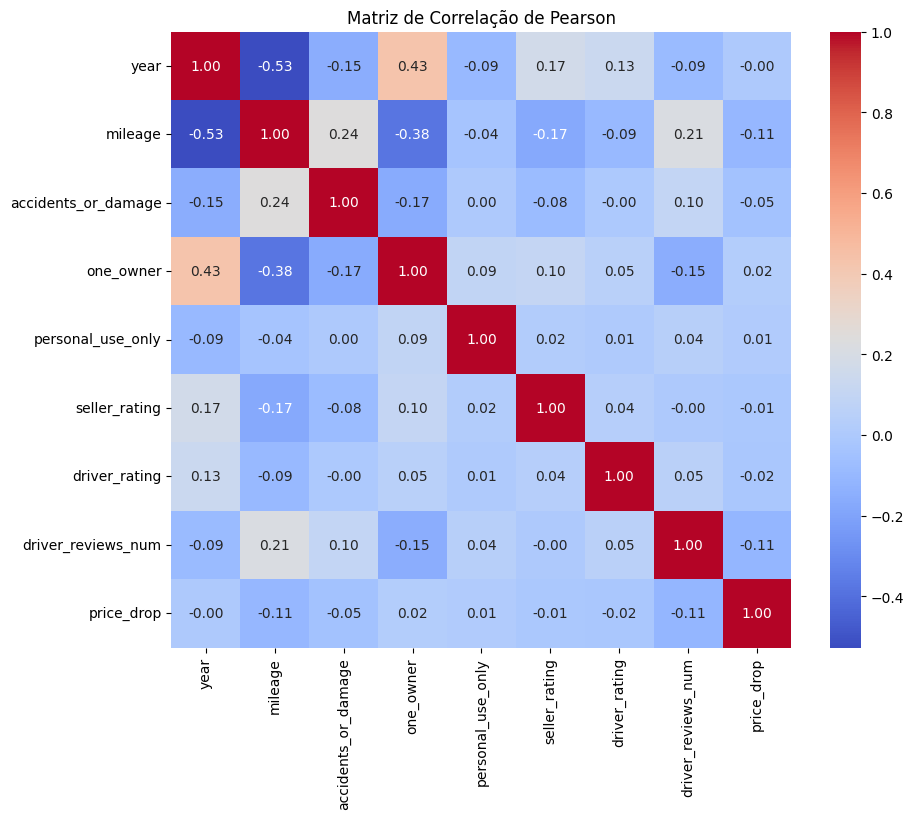

In [ ]:
# Selecionar apenas as colunas numéricas
numeric_cols = amostra_carros1.select_dtypes(include=['int64', 'float64'])

# Calcular a correlação de Pearson
correlation_matrix = numeric_cols.corr()

# Exibir a matriz de correlação
print(correlation_matrix)

# Para facilitar a visualização, usar um heatmap do Seaborn:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação de Pearson')
plt.show()


In [ ]:
# Exibe as linhas duplicadas no DataFrame amostra_carros1
duplicate_rows = amostra_carros1[amostra_carros1.duplicated()]

sorted_duplicate_rows = duplicate_rows.sort_values(by=amostra_carros1.columns.tolist())

print("Linhas duplicadas em amostra_carros1 (ordenadas alfabeticamente):")
sorted_duplicate_rows

Linhas duplicadas em amostra_carros1 (ordenadas alfabeticamente):


,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
880,Acura,ILX 2.0L w/Premium Package,2013,59121.0,2.0L I4 16V MPFI SOHC,5-Speed Automatic,Front-wheel Drive,Gasoline,NaN,Diamond White Pearl,Ebony,1.0,0.0,0.0,Serra Honda Grandville,4.9,4.6,47.0,250.0,16300.0
4532,Acura,RDX,2017,63356.0,3.5L V6 24V MPFI SOHC,6-Speed Automatic,All-wheel Drive,Gasoline,19-27,Fathom Blue Pearl,NaN,0.0,0.0,0.0,Pohanka Chevrolet,4.1,4.7,102.0,314.0,25911.0
3953,Acura,RDX,2020,54073.0,NaN,10 Speed Automatic,NaN,NaN,NaN,Majestic Black Pearl,Ebony,0.0,1.0,1.0,Southern Motors Acura,NaN,4.6,97.0,NaN,36897.0
3749,Acura,RDX,2021,13913.0,NaN,10 Speed Automatic,NaN,NaN,NaN,Majestic Black Pearl,Ebony,NaN,NaN,NaN,Acura of Maui,NaN,4.8,43.0,NaN,44995.0
2726,Acura,RDX Advance Package,2019,79984.0,2.0L I4 16V GDI DOHC Turbo,10-Speed Automatic,All-wheel Drive,Gasoline,21-27,Canyon Bronze Metallic,Parchment,0.0,0.0,1.0,Keystone Volvo Cars Berwyn,4.8,4.3,220.0,NaN,27988.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749280,Volkswagen,Tiguan 2.0T SE R-Line Black,2020,46893.0,NaN,8-Speed Automatic,NaN,NaN,NaN,Platinum Gray Metallic,Black Leatherette,0.0,1.0,1.0,Volkswagen of Downtown LA,NaN,4.7,59.0,NaN,26508.0
750467,Volkswagen,Tiguan 2.0T SEL,2019,24410.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,21-29,Cardinal Red Metallic,Gray,1.0,1.0,1.0,Automotive Avenues,4.8,4.5,137.0,500.0,23995.0
749152,Volkswagen,Tiguan Auto R-Line,2014,68771.0,2.0L I4 16V GDI DOHC Turbo,6-Speed Automatic,Front-wheel Drive,Gasoline,21-26,Gray,NaN,0.0,0.0,1.0,Serra Volkswagen,4.5,4.5,56.0,NaN,17995.0
758616,Volvo,XC60 T5 Momentum,2020,25293.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,20-27,Ice White,NaN,0.0,1.0,1.0,Karp Kia,3.9,4.9,40.0,500.0,32500.0


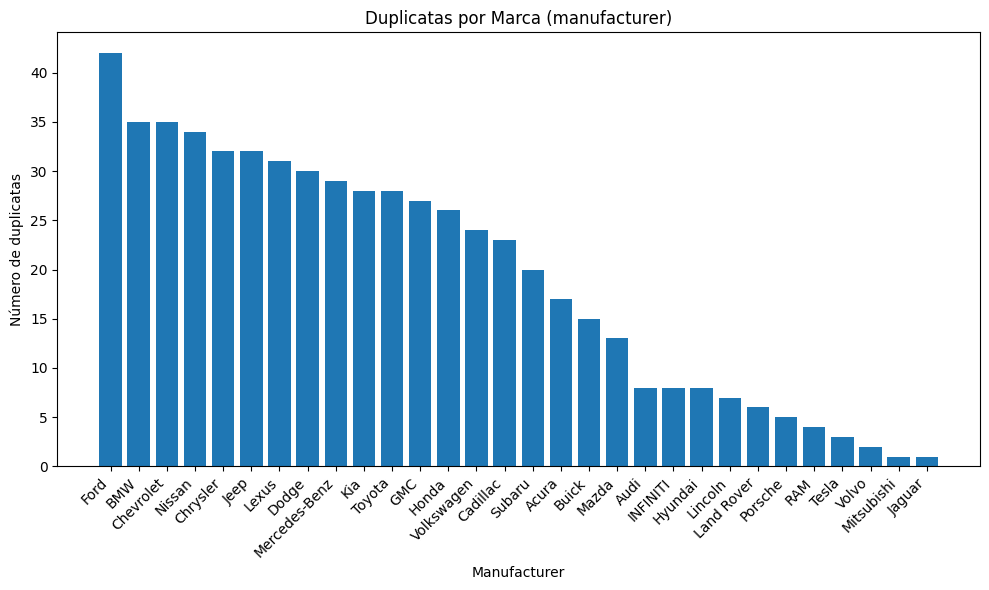

In [ ]:

# Contagem de ocorrências em manufacturer
manufacturer_counts = sorted_duplicate_rows['manufacturer'].value_counts()


plt.figure(figsize=(10, 6))
plt.bar(manufacturer_counts.index, manufacturer_counts.values)
plt.xlabel("Manufacturer")
plt.ylabel("Número de duplicatas")
plt.title("Duplicatas por Marca (manufacturer)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Exibe as linhas duplicadas no DataFrame amostra_carros1
duplicate_rows = amostra_carros1[amostra_carros1.duplicated()]

# Filtra as linhas duplicadas onde 'mileage' é igual a 0
zero_mileage_duplicates = duplicate_rows[duplicate_rows['mileage'] == 0]

# Imprime a contagem de carros com mileage = 0 entre as duplicatas
print("Número de carros com mileage = 0 entre as duplicatas:", len(zero_mileage_duplicates))

# Imprime as informações dos carros com mileage = 0 entre as duplicatas
print("\nCarros com mileage = 0 entre as duplicatas:")
zero_mileage_duplicates

Número de carros com mileage = 0 entre as duplicatas: 3

Carros com mileage = 0 entre as duplicatas:


,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
488826,Lincoln,MKZ Standard,2019,0.0,2.0L I4 16V GDI DOHC Turbo,6-Speed Automatic,Front-wheel Drive,Gasoline,20-31,White,NaN,0.0,1.0,0.0,Ulrich Ford Lincoln,4.7,4.9,32.0,NaN,31450.0
81410,Cadillac,XT5 Premium Luxury,2020,0.0,3.6L V6 24V GDI DOHC,9-Speed Automatic,All-wheel Drive,Gasoline,21-26,Dark Mocha Metallic,Cirrus,0.0,1.0,1.0,Cadillac of Mahwah,4.1,4.8,23.0,NaN,39777.0
412938,Jeep,Wrangler S,1994,0.0,2.5L I-4 engine with 123HP,Automatic,Four-wheel Drive,Gasoline,19-20,White,White/Black,0.0,0.0,1.0,Gateway Classic Cars,NaN,4.1,13.0,NaN,33000.0


In [ ]:
amostra_carros1 = amostra_carros1.drop_duplicates()

In [ ]:
exterior_color_counts = amostra_carros1['exterior_color'].value_counts()
exterior_color_counts

,count
exterior_color,
Black,14875
White,12803
Gray,7584
Silver,6039
Blue,4393
...,...
Sierra Black,1
Arctic Blue Silver,1
Blu,1


In [ ]:
def limit_exterior_color(df):
    """
    Limita os valores da coluna 'exterior_color' a um conjunto predefinido de cores
    e agrupa as demais em 'Others'.
    """
    allowed_colors = ['Black', 'White', 'Gray', 'Silver', 'Blue', 'Red', 'Green']
    df = df.copy()  # Faz uma cópia para evitar o SettingWithCopyWarning
    df['exterior_color'] = df['exterior_color'].astype(str)

    def categorize_color(color):
        color = str(color).lower()
        for allowed_color in allowed_colors:
            if allowed_color.lower() in color:
                return allowed_color
        return 'Others'

    df['exterior_color'] = df['exterior_color'].apply(categorize_color)
    return df


amostra_carros1 = limit_exterior_color(amostra_carros1)

In [ ]:
amostra_carros1['exterior_color'].value_counts()

,count
exterior_color,
White,44615
Black,40286
Others,30170
Silver,22514
Gray,19792
Blue,16874
Red,13948
Green,1749


In [ ]:
interior_color_counts = amostra_carros1['interior_color'].value_counts()
interior_color_counts

,count
interior_color,
Black,71465
Gray,12426
Jet Black,11443
Ebony,9475
Charcoal,6506
...,...
Canyon / Black / Charcoal Black,1
Jet Black With Arizona Accents,1
Black - AJX9,1


In [ ]:
def limit_interior_color(df):
    """
    Limita os valores da coluna 'interior_color' a um conjunto predefinido de cores
    e agrupa as demais em 'Others'.
    """
    # Lista de cores permitidas
    allowed_colors = ['Black', 'Gray', 'Jet Black', 'Ebony', 'Charcoal']

    # Faz uma cópia para evitar o SettingWithCopyWarning e garante que a coluna seja string
    df = df.copy()
    df['interior_color'] = df['interior_color'].astype(str)

    # Função para categorizar as cores
    def categorize_color(color):
        color = str(color).lower()  # Converte para minúsculas para garantir a comparação
        for allowed_color in allowed_colors:
            if allowed_color.lower() in color:  # Verifica se a cor permitida está na string
                return allowed_color
        return 'Others'

    # Aplica a função à coluna 'interior_color'
    df['interior_color'] = df['interior_color'].apply(categorize_color)
    return df

# Aplicando a função à amostra_carros1
amostra_carros1 = limit_interior_color(amostra_carros1)


In [ ]:
# prompt: quero visualizar as médias das variáveis numéricas

# Visualizar as médias das variáveis numéricas
print(amostra_carros1[var_num].mean())

year                    2017.784757
mileage                55838.357239
accidents_or_damage        0.228161
one_owner                  0.562383
personal_use_only          0.656749
seller_rating              4.158143
driver_rating              4.623351
driver_reviews_num        89.431655
price_drop              1009.425023
dtype: float64


In [ ]:

# Preencher valores nulos em colunas numéricas com a média de cada coluna
for col in var_num:
    if col in ['accidents_or_damage', 'one_owner', 'personal_use_only']:
        if col == 'accidents_or_damage':
            threshold = 0.228161
        elif col == 'one_owner':
            threshold = 0.562383
        else:  # col == 'personal_use_only'
            threshold = 0.656749
        amostra_carros1[col] = amostra_carros1[col].fillna(1)
        amostra_carros1.loc[amostra_carros1[col] < threshold, col] = 0
    else:
        amostra_carros1[col] = amostra_carros1[col].fillna(amostra_carros1[col].mean())

In [ ]:
for col in amostra_carros1.select_dtypes(include=['object']):
    mode_value = amostra_carros1[col].mode()[0]  # Calcula a moda da coluna
    print(f"Coluna: {col}, Moda: {mode_value}")


Coluna: manufacturer, Moda: Ford
Coluna: model, Moda: Fusion SE
Coluna: engine, Moda: 2.0L I4 16V GDI DOHC Turbo
Coluna: transmission, Moda: 6-Speed Automatic
Coluna: drivetrain, Moda: Front-wheel Drive
Coluna: fuel_type, Moda: Gasoline
Coluna: mpg, Moda: 18-25
Coluna: exterior_color, Moda: White
Coluna: interior_color, Moda: Black
Coluna: seller_name, Moda: Gateway Classic Cars
Coluna: price, Moda: 19995.0


In [ ]:
amostra_carros1.isnull().sum()

,0
manufacturer,0
model,0
year,0
mileage,0
engine,3711
transmission,2465
drivetrain,5356
fuel_type,5697
mpg,35715
exterior_color,0


In [ ]:
import re

def find_invalid_mpg(df):
    """
    Encontra e exibe os valores de 'mpg' que não seguem o padrão 'X-Y' ou 'X' (onde X e Y são números).
    """
    # Expressão regular para identificar valores do tipo 'X-Y' ou 'X' (onde X e Y são números)
    pattern = r'^\d+(\.\d+)?$|^\d+(\.\d+)?-\d+(\.\d+)?$'

    # Filtra valores que não seguem o padrão
    invalid_mpg = df[~df['mpg'].str.match(pattern, na=False)]

    return invalid_mpg

# Aplicando para encontrar valores inválidos
invalid_mpg_values = find_invalid_mpg(amostra_carros1)

# Exibindo os valores inválidos
print(invalid_mpg_values[['mpg']])



        mpg
197522  NaN
723188  NaN
213371  NaN
536851  NaN
216162  NaN
...     ...
547148  NaN
465387  NaN
9238    NaN
263449  NaN
640581  NaN

[35715 rows x 1 columns]



Frequência de fuel_type para mpg nulos:
 fuel_type
Gasoline                         17646
Diesel                            5135
Electric                          4102
Hybrid                            2517
E85 Flex Fuel                     1051
B                                  372
Plug-In Hybrid                      31
Gasoline Fuel                       14
Gasoline/Mild Electric Hybrid       14
Flexible Fuel                       13
G                                   10
Regular Unleaded                     8
Compressed Natural Gas               5
Premium Unleaded                     4
Hybrid Fuel                          2
Name: count, dtype: int64


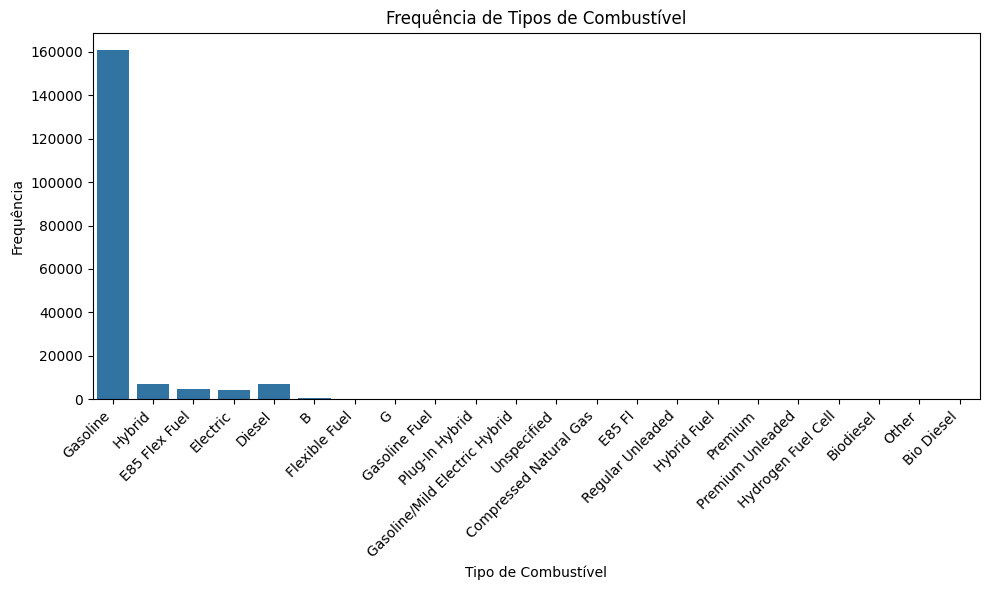

In [ ]:

null_mpg_by_fuel_type = amostra_carros1[amostra_carros1['mpg'].isnull()]['fuel_type'].value_counts()
print("\nFrequência de fuel_type para mpg nulos:\n", null_mpg_by_fuel_type)

# Gráfico de barras para fuel_type com maior frequência (considerando todos os dados)
plt.figure(figsize=(10, 6))
sns.countplot(x='fuel_type', data=amostra_carros1)
plt.title('Frequência de Tipos de Combustível')
plt.xlabel('Tipo de Combustível')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
electric_car_count = len(amostra_carros1[amostra_carros1['fuel_type'] == 'Electric'])

print(f"Number of electric cars in the sample: {electric_car_count}")

Number of electric cars in the sample: 4102


In [ ]:
#Verifica quantos modelos possuem Engine e fuel_type como valores faltantes
missing_engine_fuel = amostra_carros1[amostra_carros1['engine'].isnull() & amostra_carros1['fuel_type'].isnull()]
num_missing = len(missing_engine_fuel)
print(f"Número de modelos com 'Engine' e 'fuel_type' faltantes: {num_missing}")

Número de modelos com 'Engine' e 'fuel_type' faltantes: 2825


In [ ]:
# Drop linhas onde 'Engine' e 'fuel_type' são nulos
amostra_carros1 = amostra_carros1.dropna(subset=['engine', 'fuel_type'])

In [ ]:
def fill_missing_values(df):
    mode_dict = {
        'engine': 'Unknown',  # Preencher com 'Unknown' para engine
        'seller_name': 'Unknown',  # Preencher com 'Unknown' para seller_name
    }

    # Iterando pelas colunas de tipo object
    for col in df.select_dtypes(include=['object']).columns:
        if col in mode_dict:
            # Para as colunas que estão no dicionário de substituição, preenchemos com o valor do dicionário
            df[col] = df[col].fillna(mode_dict[col])  # Preenche com valores do dicionário
        elif df[col].isnull().sum() > 0:
            # Para as colunas que possuem valores nulos, preenchemos com a moda da coluna
            df[col] = df[col].fillna(df[col].mode()[0])  # Preenche com a moda da coluna

    return df

# Chamada da função
amostra_carros1 = fill_missing_values(amostra_carros1)



In [ ]:
amostra_carros1

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
7532,Acura,TLX V6 w/Technology Package,2019,48266.0,3.5L V6 24V GDI SOHC,9-Speed Automatic,All-wheel Drive,Gasoline,20-29,White,Others,1.0,1.0,1.0,White Bear Subaru,4.700000,4.400000,56.0,1000.000000,28995.0
336281,Honda,Insight EX,2022,5026.0,1.5L I4 16V MPFI DOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,55-49,White,Others,0.0,1.0,1.0,Auto Expo 95,4.158143,4.623351,0.0,2746.000000,31995.0
266023,Ford,Mustang EcoBoost,2018,45148.0,"EcoBoost 2.3L I-4 gasoline direct injection, D...",Manual,Rear-wheel Drive,Gasoline,20-28,Red,Ebony,0.0,0.0,1.0,LAX Chrysler Dodge Jeep RAM,4.800000,4.800000,192.0,150.000000,20350.0
224994,Ford,Expedition EL Limited,2014,160899.0,5.4L V8 24V MPFI SOHC Flexible Fuel,6-Speed Automatic,Four-wheel Drive,E85 Flex Fuel,13-18,Red,Others,0.0,0.0,1.0,The Bear Lot,4.158143,4.500000,14.0,600.000000,16992.0
132622,Chevrolet,Blazer RS,2019,26245.0,3.6L V6 24V GDI DOHC,9-Speed Automatic,Front-wheel Drive,Gasoline,20-26,Black,Black,1.0,0.0,0.0,Schwieters Chevrolet of Willmar,3.800000,4.400000,118.0,1009.425023,34999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445095,Kia,Rio LX,2020,42144.0,1.6L I4 16V MPFI DOHC,Automatic CVT,Front-wheel Drive,Gasoline,33-41,Black,Black,0.0,1.0,1.0,Courtesy Kia,3.900000,4.600000,30.0,332.000000,16111.0
407970,Jeep,Renegade Latitude,2016,142126.0,2.4L I4 16V MPFI SOHC,9-Speed Automatic,Four-wheel Drive,Gasoline,24-31,Others,Black,0.0,1.0,1.0,Al Serra Auto Plaza,4.500000,4.400000,187.0,500.000000,11500.0
263449,Ford,Mustang LX 5.0L Sport,1990,100514.0,5.0L V8 16V OHV,Automatic with Overdrive,Rear-wheel Drive,Gasoline,18-25,Green,Others,0.0,0.0,0.0,Paul Sevag Motors Inc.,5.000000,4.700000,5.0,2250.000000,18500.0
34845,BMW,330 i xDrive,2017,36795.0,2.0L,8-Speed Automatic,All-wheel Drive,Gasoline,23-33,Black,Black,0.0,0.0,1.0,Deery Brothers of Dubuque,4.158143,4.800000,41.0,141.000000,24999.0


In [ ]:
transmission_counts = amostra_carros1['transmission'].value_counts()
print(transmission_counts.head(30))

transmission
6-Speed Automatic                     37044
8-Speed Automatic                     34528
Automatic CVT                         26541
Automatic                             23247
9-Speed Automatic                     15052
10-Speed Automatic                     9888
5-Speed Automatic                      5788
7-Speed Automatic                      4675
7-Speed Automatic with Auto-Shift      3897
6-Speed Manual                         3443
1-Speed Automatic                      3369
4-Speed Automatic                      3033
6-Speed Automatic with Auto-Shift      1489
8-Speed Automatic with Auto-Shift      1233
Manual                                  904
5-Speed Manual                          860
A/T                                     782
Variable                                520
Continuously Variable Transmission      341
8-Speed A/T                             239
6-Speed A/T                             225
6-Speed                                 220
Transmission w/Dual

In [ ]:
def treat_transmission(df):
    # Função para mapear a transmissão
    def map_transmission(value):
        value = str(value).lower()  # Tornar a string minúscula para facilitar a comparação
        if "automatic" in value and "cv" not in value:
            return "Automatic"
        elif "cv" in value or "cvt" in value:
            return "Automatic CVT"
        elif "manual" in value or "m/t" in value:
            return "Manual"
        else:
            return "Others"

    # Aplicar a função na coluna transmission
    df['transmission'] = df['transmission'].apply(map_transmission)

    return df

# Chamada da função
amostra_carros1 = treat_transmission(amostra_carros1)


In [ ]:
amostra_carros1

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
7532,Acura,TLX V6 w/Technology Package,2019,48266.0,3.5L V6 24V GDI SOHC,Automatic,All-wheel Drive,Gasoline,20-29,White,Others,1.0,1.0,1.0,White Bear Subaru,4.700000,4.400000,56.0,1000.000000,28995.0
336281,Honda,Insight EX,2022,5026.0,1.5L I4 16V MPFI DOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,55-49,White,Others,0.0,1.0,1.0,Auto Expo 95,4.158143,4.623351,0.0,2746.000000,31995.0
266023,Ford,Mustang EcoBoost,2018,45148.0,"EcoBoost 2.3L I-4 gasoline direct injection, D...",Manual,Rear-wheel Drive,Gasoline,20-28,Red,Ebony,0.0,0.0,1.0,LAX Chrysler Dodge Jeep RAM,4.800000,4.800000,192.0,150.000000,20350.0
224994,Ford,Expedition EL Limited,2014,160899.0,5.4L V8 24V MPFI SOHC Flexible Fuel,Automatic,Four-wheel Drive,E85 Flex Fuel,13-18,Red,Others,0.0,0.0,1.0,The Bear Lot,4.158143,4.500000,14.0,600.000000,16992.0
132622,Chevrolet,Blazer RS,2019,26245.0,3.6L V6 24V GDI DOHC,Automatic,Front-wheel Drive,Gasoline,20-26,Black,Black,1.0,0.0,0.0,Schwieters Chevrolet of Willmar,3.800000,4.400000,118.0,1009.425023,34999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445095,Kia,Rio LX,2020,42144.0,1.6L I4 16V MPFI DOHC,Automatic CVT,Front-wheel Drive,Gasoline,33-41,Black,Black,0.0,1.0,1.0,Courtesy Kia,3.900000,4.600000,30.0,332.000000,16111.0
407970,Jeep,Renegade Latitude,2016,142126.0,2.4L I4 16V MPFI SOHC,Automatic,Four-wheel Drive,Gasoline,24-31,Others,Black,0.0,1.0,1.0,Al Serra Auto Plaza,4.500000,4.400000,187.0,500.000000,11500.0
263449,Ford,Mustang LX 5.0L Sport,1990,100514.0,5.0L V8 16V OHV,Automatic,Rear-wheel Drive,Gasoline,18-25,Green,Others,0.0,0.0,0.0,Paul Sevag Motors Inc.,5.000000,4.700000,5.0,2250.000000,18500.0
34845,BMW,330 i xDrive,2017,36795.0,2.0L,Automatic,All-wheel Drive,Gasoline,23-33,Black,Black,0.0,0.0,1.0,Deery Brothers of Dubuque,4.158143,4.800000,41.0,141.000000,24999.0


In [ ]:
# prompt: gere um código que mostre os carros atuais com fuel type eletric

# Exibir os carros atuais com fuel_type 'Electric'
electric_cars = amostra_carros1[amostra_carros1['fuel_type'] == 'Electric']
electric_cars

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
213371,Ford,Mustang Mach-E Premium,2022,1419.0,Electric,Automatic,Rear-wheel Drive,Electric,18-25,White,Others,0.0,1.0,1.0,Davis Chevrolet,4.4,4.900000,4.0,1009.425023,52371.0
99644,Chevrolet,Bolt EV LT,2020,21587.0,Electric,Automatic,Front-wheel Drive,Electric,18-25,White,Gray,0.0,1.0,1.0,Car Connection Inc.,3.2,4.500000,29.0,872.000000,23700.0
609735,Porsche,Taycan Base,2022,16045.0,Electric,Automatic,Rear-wheel Drive,Electric,18-25,Silver,Black,0.0,0.0,1.0,Hennessy Porsche,4.9,4.623351,0.0,1680.000000,89179.0
434954,Kia,EV6 Wind,2022,12143.0,Electric Motor,Automatic,Rear-wheel Drive,Electric,18-25,Gray,Gray,0.0,1.0,1.0,Valley Kia of Fontana,4.0,4.700000,13.0,1009.425023,44995.0
755004,Volvo,XC40 Recharge Pure Electric P8,2021,9252.0,Electric,Automatic,All-wheel Drive,Electric,18-25,Green,Charcoal,0.0,1.0,1.0,Candy Cars,5.0,4.800000,5.0,1009.425023,48986.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664423,Tesla,Model Y Long Range,2021,29738.0,Electric,Automatic,All-wheel Drive,Electric,18-25,White,Others,0.0,1.0,1.0,AutoMax Preowned Framingham,4.5,3.800000,20.0,500.000000,50999.0
666640,Tesla,Model 3 Long Range,2018,40840.0,ELECTRIC MOTOR,Automatic,All-wheel Drive,Electric,18-25,Black,Others,0.0,1.0,0.0,Imperial Auto LLC,3.5,4.600000,117.0,1000.000000,33995.0
663761,Tesla,Model Y Long Range,2020,50629.0,Electric,Automatic,All-wheel Drive,Electric,18-25,Gray,Black,0.0,1.0,0.0,Crossroads Hyundai of Loveland,1.8,3.700000,11.0,851.000000,44998.0
127347,Chevrolet,Volt Base,2013,57546.0,Electric,Automatic,Front-wheel Drive,Electric,18-25,Red,Black,1.0,0.0,1.0,Larry H. Miller Nissan 104th,4.2,4.600000,114.0,500.000000,14500.0


In [ ]:
(18+25)/2

21.5

In [ ]:
def calculate_mpg_average(df):
    # Função para calcular a média dos valores de mpg no formato 'valor1-valor2' ou manter o valor único
    def get_mpg_average(mpg_value):
        if isinstance(mpg_value, str):
            if '-' in mpg_value:
                # Separar os dois valores usando o hífen
                values = mpg_value.split('-')
                try:
                    # Converter para float e calcular a média
                    avg_value = (float(values[0]) + float(values[1])) / 2
                    return avg_value
                except ValueError:
                    return mpg_value  # Retornar o valor original se houver erro de conversão
            else:
                # Se for um valor único, retornar o próprio valor
                try:
                    return float(mpg_value)
                except ValueError:
                    return mpg_value  # Retornar o valor original caso não seja um número válido
        return mpg_value  # Retornar o valor original caso o valor não seja uma string

    # Aplicar a função na coluna 'mpg'
    df['mpg'] = df['mpg'].apply(get_mpg_average)

    return df

# Chamada da função para aplicar no DataFrame
amostra_carros1 = calculate_mpg_average(amostra_carros1)


In [ ]:
electric_cars = amostra_carros1[amostra_carros1['fuel_type'] == 'Electric']
electric_cars

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
213371,Ford,Mustang Mach-E Premium,2022,1419.0,Electric,Automatic,Rear-wheel Drive,Electric,21.5,White,Others,0.0,1.0,1.0,Davis Chevrolet,4.4,4.900000,4.0,1009.425023,52371.0
99644,Chevrolet,Bolt EV LT,2020,21587.0,Electric,Automatic,Front-wheel Drive,Electric,21.5,White,Gray,0.0,1.0,1.0,Car Connection Inc.,3.2,4.500000,29.0,872.000000,23700.0
609735,Porsche,Taycan Base,2022,16045.0,Electric,Automatic,Rear-wheel Drive,Electric,21.5,Silver,Black,0.0,0.0,1.0,Hennessy Porsche,4.9,4.623351,0.0,1680.000000,89179.0
434954,Kia,EV6 Wind,2022,12143.0,Electric Motor,Automatic,Rear-wheel Drive,Electric,21.5,Gray,Gray,0.0,1.0,1.0,Valley Kia of Fontana,4.0,4.700000,13.0,1009.425023,44995.0
755004,Volvo,XC40 Recharge Pure Electric P8,2021,9252.0,Electric,Automatic,All-wheel Drive,Electric,21.5,Green,Charcoal,0.0,1.0,1.0,Candy Cars,5.0,4.800000,5.0,1009.425023,48986.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664423,Tesla,Model Y Long Range,2021,29738.0,Electric,Automatic,All-wheel Drive,Electric,21.5,White,Others,0.0,1.0,1.0,AutoMax Preowned Framingham,4.5,3.800000,20.0,500.000000,50999.0
666640,Tesla,Model 3 Long Range,2018,40840.0,ELECTRIC MOTOR,Automatic,All-wheel Drive,Electric,21.5,Black,Others,0.0,1.0,0.0,Imperial Auto LLC,3.5,4.600000,117.0,1000.000000,33995.0
663761,Tesla,Model Y Long Range,2020,50629.0,Electric,Automatic,All-wheel Drive,Electric,21.5,Gray,Black,0.0,1.0,0.0,Crossroads Hyundai of Loveland,1.8,3.700000,11.0,851.000000,44998.0
127347,Chevrolet,Volt Base,2013,57546.0,Electric,Automatic,Front-wheel Drive,Electric,21.5,Red,Black,1.0,0.0,1.0,Larry H. Miller Nissan 104th,4.2,4.600000,114.0,500.000000,14500.0


In [ ]:
amostra_carros1

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
7532,Acura,TLX V6 w/Technology Package,2019,48266.0,3.5L V6 24V GDI SOHC,Automatic,All-wheel Drive,Gasoline,24.5,White,Others,1.0,1.0,1.0,White Bear Subaru,4.700000,4.400000,56.0,1000.000000,28995.0
336281,Honda,Insight EX,2022,5026.0,1.5L I4 16V MPFI DOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,52.0,White,Others,0.0,1.0,1.0,Auto Expo 95,4.158143,4.623351,0.0,2746.000000,31995.0
266023,Ford,Mustang EcoBoost,2018,45148.0,"EcoBoost 2.3L I-4 gasoline direct injection, D...",Manual,Rear-wheel Drive,Gasoline,24.0,Red,Ebony,0.0,0.0,1.0,LAX Chrysler Dodge Jeep RAM,4.800000,4.800000,192.0,150.000000,20350.0
224994,Ford,Expedition EL Limited,2014,160899.0,5.4L V8 24V MPFI SOHC Flexible Fuel,Automatic,Four-wheel Drive,E85 Flex Fuel,15.5,Red,Others,0.0,0.0,1.0,The Bear Lot,4.158143,4.500000,14.0,600.000000,16992.0
132622,Chevrolet,Blazer RS,2019,26245.0,3.6L V6 24V GDI DOHC,Automatic,Front-wheel Drive,Gasoline,23.0,Black,Black,1.0,0.0,0.0,Schwieters Chevrolet of Willmar,3.800000,4.400000,118.0,1009.425023,34999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445095,Kia,Rio LX,2020,42144.0,1.6L I4 16V MPFI DOHC,Automatic CVT,Front-wheel Drive,Gasoline,37.0,Black,Black,0.0,1.0,1.0,Courtesy Kia,3.900000,4.600000,30.0,332.000000,16111.0
407970,Jeep,Renegade Latitude,2016,142126.0,2.4L I4 16V MPFI SOHC,Automatic,Four-wheel Drive,Gasoline,27.5,Others,Black,0.0,1.0,1.0,Al Serra Auto Plaza,4.500000,4.400000,187.0,500.000000,11500.0
263449,Ford,Mustang LX 5.0L Sport,1990,100514.0,5.0L V8 16V OHV,Automatic,Rear-wheel Drive,Gasoline,21.5,Green,Others,0.0,0.0,0.0,Paul Sevag Motors Inc.,5.000000,4.700000,5.0,2250.000000,18500.0
34845,BMW,330 i xDrive,2017,36795.0,2.0L,Automatic,All-wheel Drive,Gasoline,28.0,Black,Black,0.0,0.0,1.0,Deery Brothers of Dubuque,4.158143,4.800000,41.0,141.000000,24999.0


# Outliers (visualizações e tratamentos)

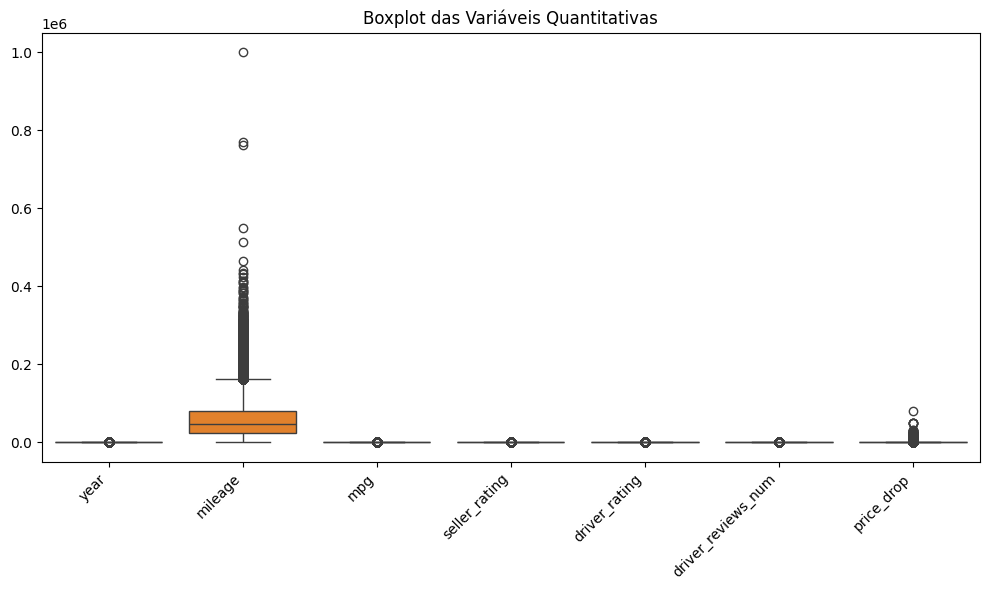

In [ ]:
# Selecionar apenas as colunas numéricas, excluindo as especificadas
numeric_cols = amostra_carros1.select_dtypes(include=['int64', 'float64'])
cols_to_exclude = ['accidents_or_damage', 'one_owner', 'personal_use_only']
numeric_cols = numeric_cols.drop(columns=cols_to_exclude, errors='ignore')

# Criar o boxplot para as colunas numéricas restantes
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_cols)
plt.title('Boxplot das Variáveis Quantitativas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

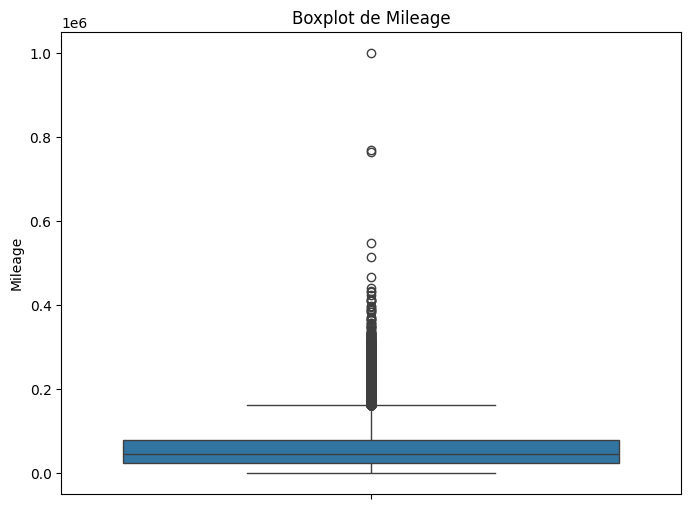

In [ ]:

# Criar o boxplot para a coluna 'mileage'
plt.figure(figsize=(8, 6))
sns.boxplot(y='mileage', data=amostra_carros1)
plt.title('Boxplot de Mileage')
plt.ylabel('Mileage')
plt.show()

In [ ]:
# Encontrando o valor máximo e mínimo de mileage
max_mileage = amostra_carros1['mileage'].max()
min_mileage = amostra_carros1['mileage'].min()

print(f"Valor máximo de mileage: {max_mileage}")
print(f"Valor mínimo de mileage: {min_mileage}")

Valor máximo de mileage: 999999.0
Valor mínimo de mileage: 0.0


In [ ]:
# prompt: faça a média dos valores de mileage em amostra_carros1

# Calculate the mean of 'mileage'
mean_mileage = amostra_carros1['mileage'].mean()

print(f"A média dos valores de mileage em amostra_carros1 é: {mean_mileage}")

A média dos valores de mileage em amostra_carros1 é: 56467.71695803883


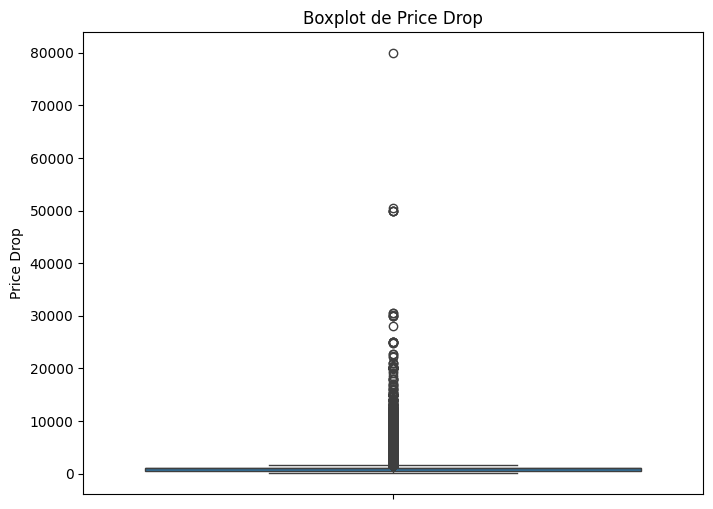

In [ ]:
# Criar o boxplot para a coluna price_drop
plt.figure(figsize=(8, 6))
sns.boxplot(y='price_drop', data=amostra_carros1)
plt.title('Boxplot de Price Drop')
plt.ylabel('Price Drop')
plt.show()

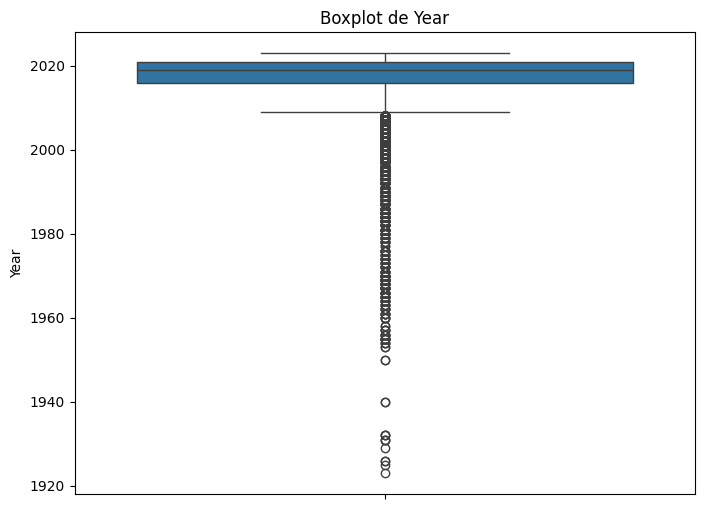

In [ ]:
# Criar o boxplot para a coluna 'year'
plt.figure(figsize=(8, 6))
sns.boxplot(y='year', data=amostra_carros1)
plt.title('Boxplot de Year')
plt.ylabel('Year')
plt.show()

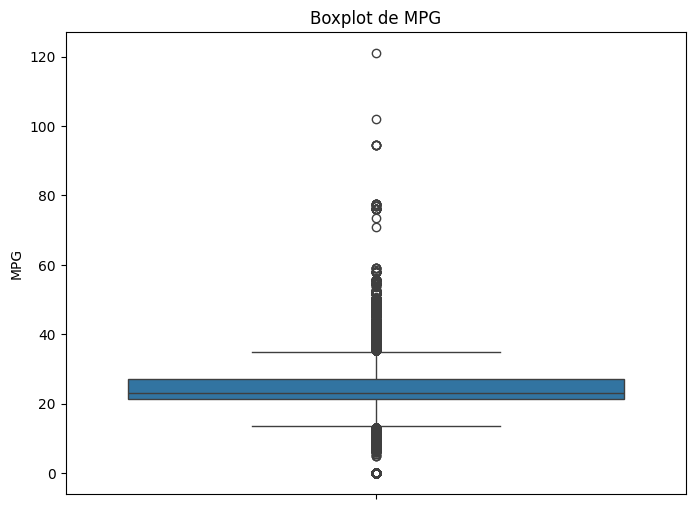

In [ ]:
# Criar o boxplot para a coluna 'mpg'
plt.figure(figsize=(8, 6))
sns.boxplot(y='mpg', data=amostra_carros1)
plt.title('Boxplot de MPG')
plt.ylabel('MPG')
plt.show()

In [ ]:
# Filtra o DataFrame para mostrar apenas os modelos com MPG maior que 60
modelos_mpg_maior_60 = amostra_carros1[amostra_carros1['mpg'] > 60]

# Exibe os modelos
modelos_mpg_maior_60

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
372797,Jaguar,I-PACE EV400 HSE,2020,22829.0,Electric,Automatic,All-wheel Drive,Gasoline,76.0,White,Ebony,0.0,0.0,1.0,Superstition Springs Lexus,4.800000,4.100000,4.0,1333.000000,53466.0
372735,Jaguar,I-PACE EVV400 S,2020,13874.0,Electric,Automatic,All-wheel Drive,Gasoline,76.0,Black,Ebony,0.0,1.0,1.0,The Audi Exchange,4.700000,4.100000,4.0,1000.000000,46987.0
372712,Jaguar,I-PACE EVV400 S,2020,16360.0,Electric,Automatic,All-wheel Drive,Gasoline,76.0,Black,Ebony,0.0,1.0,1.0,BMW of San Francisco,1.600000,4.100000,4.0,792.000000,47999.0
372793,Jaguar,I-PACE EV400 HSE,2020,25562.0,Electric,Automatic,All-wheel Drive,Gasoline,76.0,White,Ebony,0.0,1.0,1.0,Desert European Motorcars,3.800000,4.100000,4.0,2000.000000,52769.0
15798,Audi,e-tron Premium Plus,2021,13845.0,Electric,Automatic,All-wheel Drive,Gasoline,77.5,Black,Black,0.0,1.0,1.0,Audi North Orlando,4.700000,5.000000,3.0,2499.000000,52500.0
372697,Jaguar,I-PACE EVV400 S,2020,34203.0,Electric,Automatic,All-wheel Drive,Gasoline,76.0,White,Ebony,0.0,1.0,1.0,BMW West Palm Beach,4.600000,4.100000,4.0,500.000000,46495.0
372729,Jaguar,I-PACE EVV400 S,2020,19433.0,Electric,Automatic,All-wheel Drive,Gasoline,76.0,Others,Ebony,0.0,1.0,1.0,Off Lease Only Palm Beach,4.900000,4.100000,4.0,200.000000,45999.0
15916,Audi,e-tron S line Premium,2022,6845.0,Electric,Automatic,All-wheel Drive,Gasoline,77.0,White,Black,0.0,1.0,0.0,"Paul Miller Inc, DBA Paul Miller Audi",4.900000,4.623351,0.0,400.000000,61951.0
693803,Toyota,Mirai XLE,2021,27941.0,Electric,Automatic,RWD,Hydrogen Fuel Cell,73.5,Black,Black,0.0,1.0,1.0,Longo Toyota,4.700000,4.800000,2.0,2289.000000,29988.0
372809,Jaguar,I-PACE EV400 HSE,2020,20643.0,Electric,Automatic,All-wheel Drive,Gasoline,76.0,Others,Ebony,1.0,1.0,1.0,Jaguar Land Rover West Houston,4.500000,4.100000,4.0,1009.425023,49991.0


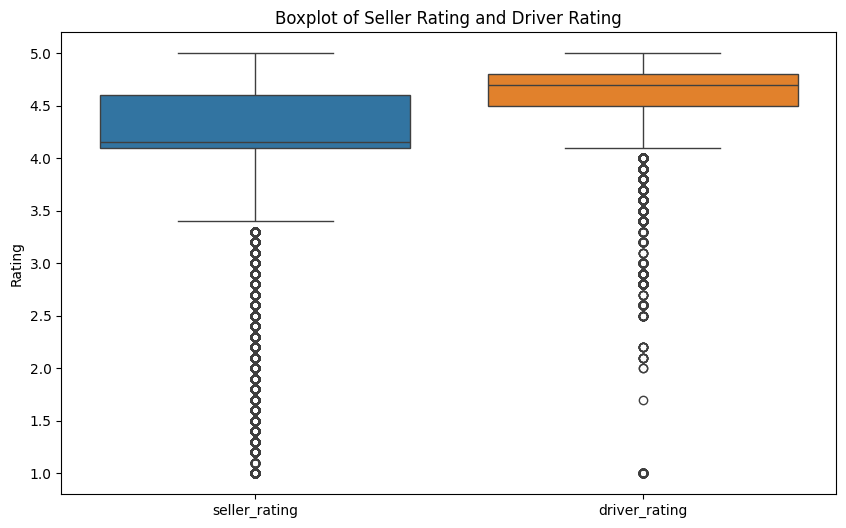

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=amostra_carros1[['seller_rating', 'driver_rating']])
plt.title('Boxplot of Seller Rating and Driver Rating')
plt.ylabel('Rating')
plt.show()

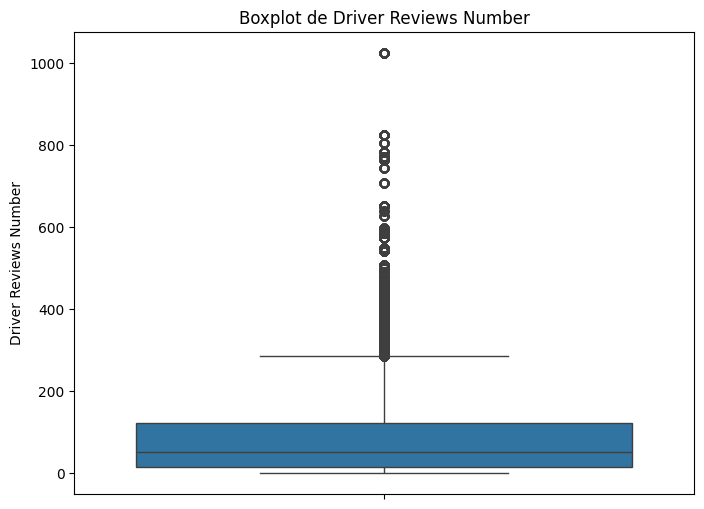

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='driver_reviews_num', data=amostra_carros1)
plt.title('Boxplot de Driver Reviews Number')
plt.ylabel('Driver Reviews Number')
plt.show()

In [ ]:
# Função para calcular o Z-score
def calcular_zscore(df, coluna):
  """
  Calcula o Z-score para uma coluna específica de um DataFrame.

  Args:
    df: O DataFrame de entrada.
    coluna: O nome da coluna para a qual calcular o Z-score.

  Returns:
    Uma série pandas contendo os Z-scores para a coluna especificada.
  """
  media = df[coluna].mean()
  desvio_padrao = df[coluna].std()
  zscores = (df[coluna] - media) / desvio_padrao
  return zscores

# Lidando com outliers usando Z-score
def tratar_outliers_zscore(df, coluna, threshold=3):
    """
    Identifica e trata outliers em uma coluna usando o Z-score.

    Args:
        df: DataFrame com a coluna a ser analisada.
        coluna: Nome da coluna com possíveis outliers.
        threshold: Limite para o Z-score, valores acima ou abaixo são considerados outliers (padrão 3).

    Returns:
        DataFrame com os outliers tratados (substituídos pela média ou mediana).
    """
    zscores = calcular_zscore(df, coluna)
    outliers = (zscores > threshold) | (zscores < -threshold)

    # Substitui outliers pela mediana para dados assimétricos e pela média para dados simétricos
    if df[coluna].skew() > 0.5 or df[coluna].skew() < -0.5:  #Verifica se a distribuição é assimétrica
        df.loc[outliers, coluna] = df[coluna].median()
        print(f"Outliers em '{coluna}' tratados com a mediana.")
    else:
        df.loc[outliers, coluna] = df[coluna].mean()
        print(f"Outliers em '{coluna}' tratados com a média.")
    return df

# Aplicando a função para tratar outliers nas colunas numéricas, excluindo as colunas especificadas
numeric_cols = amostra_carros1.select_dtypes(include=['int64', 'float64'])
cols_to_exclude = ['accidents_or_damage', 'one_owner', 'personal_use_only']
for col in numeric_cols.drop(columns=cols_to_exclude, errors='ignore'):
  amostra_carros1 = tratar_outliers_zscore(amostra_carros1, col)

# Após tratar outliers, é recomendado reavaliar as estatísticas descritivas, visualizações
# e correlação dos dados para confirmar a efetividade do método e se há necessidade de novas medidas.

# Exemplo de reavaliação
print(amostra_carros1.describe()) # Estatísticas descritivas

Outliers em 'year' tratados com a mediana.
Outliers em 'mileage' tratados com a mediana.
Outliers em 'mpg' tratados com a mediana.
Outliers em 'seller_rating' tratados com a mediana.
Outliers em 'driver_rating' tratados com a mediana.
Outliers em 'driver_reviews_num' tratados com a mediana.
Outliers em 'price_drop' tratados com a mediana.
               year        mileage            mpg  accidents_or_damage  \
count  183365.00000  183365.000000  183365.000000        183365.000000   
mean     2018.19206   54279.470684      24.049052             0.256074   
std         3.48308   39139.583318       4.821715             0.436464   
min      2005.00000       0.000000       6.500000             0.000000   
25%      2017.00000   23794.000000      21.500000             0.000000   
50%      2019.00000   46619.000000      23.000000             0.000000   
75%      2021.00000   77059.000000      27.000000             1.000000   
max      2023.00000  187330.000000      42.000000             1.000

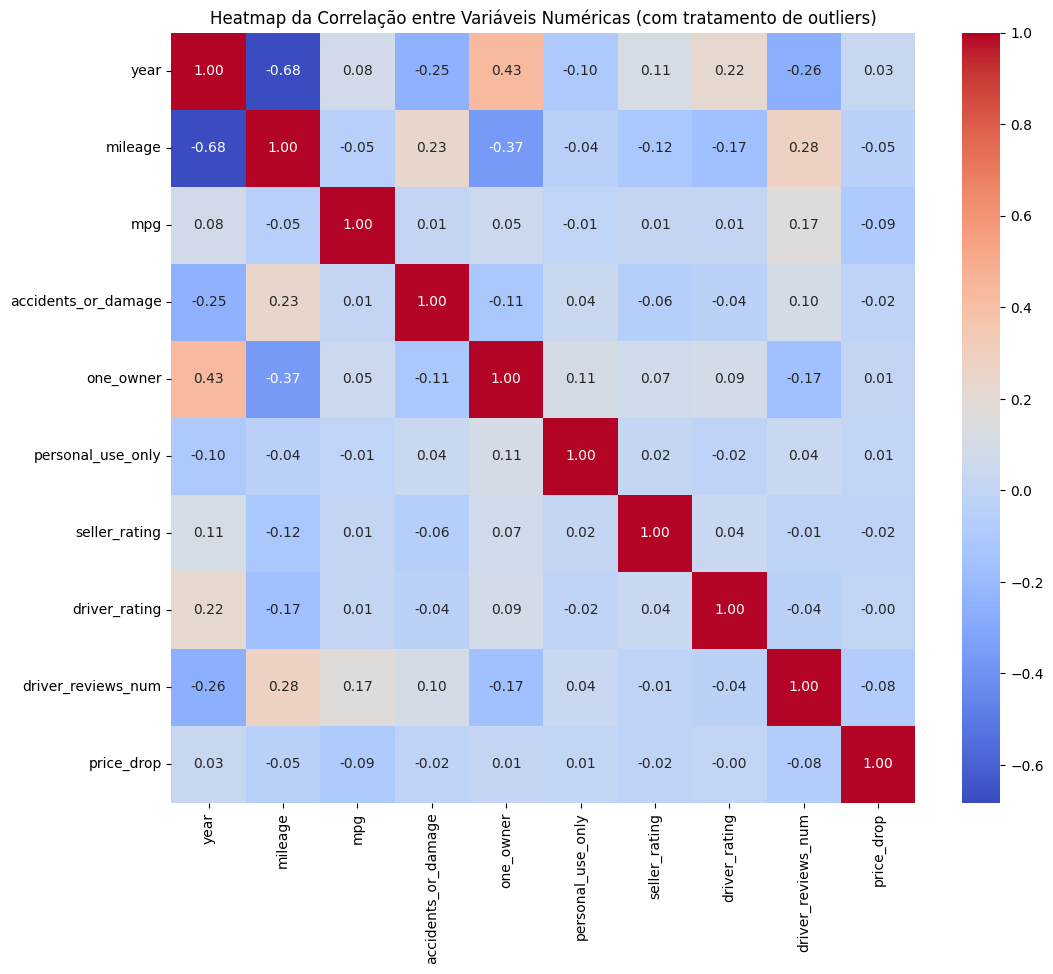

In [ ]:
# Selecionar apenas as colunas numéricas
numeric_cols = amostra_carros1.select_dtypes(include=['int64', 'float64'])

# Calcular a correlação de Pearson
correlation_matrix = numeric_cols.corr()

# Criar o heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap da Correlação entre Variáveis Numéricas (com tratamento de outliers)')
plt.show()

In [ ]:
# prompt: mostre os valores nulos para amostra_carros1

# Exibir a soma dos valores nulos por coluna
print(amostra_carros1.isnull().sum())

manufacturer           0
model                  0
year                   0
mileage                0
engine                 0
transmission           0
drivetrain             0
fuel_type              0
mpg                    0
exterior_color         0
interior_color         0
accidents_or_damage    0
one_owner              0
personal_use_only      0
seller_name            0
seller_rating          0
driver_rating          0
driver_reviews_num     0
price_drop             0
price                  0
dtype: int64


In [ ]:
amostra_carros1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183365 entries, 7532 to 443935
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manufacturer         183365 non-null  object 
 1   model                183365 non-null  object 
 2   year                 183365 non-null  int64  
 3   mileage              183365 non-null  float64
 4   engine               183365 non-null  object 
 5   transmission         183365 non-null  object 
 6   drivetrain           183365 non-null  object 
 7   fuel_type            183365 non-null  object 
 8   mpg                  183365 non-null  float64
 9   exterior_color       183365 non-null  object 
 10  interior_color       183365 non-null  object 
 11  accidents_or_damage  183365 non-null  float64
 12  one_owner            183365 non-null  float64
 13  personal_use_only    183365 non-null  float64
 14  seller_name          183365 non-null  object 
 15  seller_rating      

# Encoding


In [ ]:
amostra_carros1['price'] = pd.to_numeric(amostra_carros1['price'], errors='coerce')

In [ ]:
# Exibe os primeiros 10 maiores valores da coluna 'price' e seus tipos
top_10_prices = amostra_carros1.nlargest(10, 'price')
print(top_10_prices[['price']])
print("\nTipos de dados dos 10 maiores valores de 'price':")
print(top_10_prices['price'].dtype)

               price
188260  1.000000e+09
613083  1.495000e+06
613082  1.400000e+06
616430  1.350000e+06
213641  1.269000e+06
244466  1.111111e+06
616115  7.899000e+05
616031  6.990000e+05
616253  5.509900e+05
616032  5.500000e+05

Tipos de dados dos 10 maiores valores de 'price':
float64


In [ ]:
# Exibe os primeiros 10 maiores valores da coluna 'price' e seus tipos
print(amostra_carros1['price'].head(10))
print(amostra_carros1['price'].dtype)

7532      28995.0
336281    31995.0
266023    20350.0
224994    16992.0
132622    34999.0
389034    44871.0
197522    62788.0
723188    11500.0
213371    52371.0
562582    28991.0
Name: price, dtype: float64
float64


In [ ]:
amostra_carros1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183365 entries, 7532 to 443935
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manufacturer         183365 non-null  object 
 1   model                183365 non-null  object 
 2   year                 183365 non-null  int64  
 3   mileage              183365 non-null  float64
 4   engine               183365 non-null  object 
 5   transmission         183365 non-null  object 
 6   drivetrain           183365 non-null  object 
 7   fuel_type            183365 non-null  object 
 8   mpg                  183365 non-null  float64
 9   exterior_color       183365 non-null  object 
 10  interior_color       183365 non-null  object 
 11  accidents_or_damage  183365 non-null  float64
 12  one_owner            183365 non-null  float64
 13  personal_use_only    183365 non-null  float64
 14  seller_name          183365 non-null  object 
 15  seller_rating      

In [ ]:
!pip install category_encoders
import category_encoders as ce

# Lista de colunas categóricas (ajuste conforme suas colunas)
categorical_features = ['manufacturer', 'model', 'transmission', 'drivetrain', 'fuel_type', 'exterior_color', 'interior_color', 'seller_name', 'engine']

# Inicializar o Target Encoder
target_encoder = ce.TargetEncoder(cols=categorical_features)

# Aplicar o Target Encoding, usando 'price' como target
amostra_carros1_encoded = target_encoder.fit_transform(amostra_carros1, amostra_carros1['price'])

# Exibir o DataFrame resultante
amostra_carros1_encoded

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
7532,27723.897810,27639.540079,2019,48266.0,32930.630106,40715.285867,53383.609994,37630.831013,24.5,34547.304302,32966.429533,1.0,1.0,1.0,26254.308282,4.700000,4.400000,56.0,1000.000000,28995.0
336281,24657.551079,23955.285587,2022,5026.0,20134.003067,24068.740869,21864.092702,33626.305197,23.0,34547.304302,32966.429533,0.0,1.0,1.0,36878.213657,4.158143,4.623351,0.0,2746.000000,31995.0
266023,33142.253181,25821.202151,2018,45148.0,30992.136159,32642.418818,36869.535605,37630.831013,24.0,30537.888132,35158.332642,0.0,0.0,1.0,30395.753748,4.800000,4.800000,192.0,150.000000,20350.0
224994,33142.253181,20998.643377,2014,160899.0,14374.105732,40715.285867,41240.725948,20947.831056,15.5,30537.888132,32966.429533,0.0,0.0,1.0,31339.772953,4.158143,4.500000,14.0,600.000000,16992.0
132622,31219.186468,37929.956156,2019,26245.0,30043.506710,40715.285867,21864.092702,37630.831013,23.0,59782.508976,44100.505215,1.0,0.0,0.0,29632.665634,3.800000,4.400000,118.0,1009.425023,34999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445095,22590.261199,12839.352485,2020,42144.0,16602.802532,24068.740869,21864.092702,37630.831013,37.0,59782.508976,44100.505215,0.0,1.0,1.0,27189.616413,3.900000,4.600000,30.0,332.000000,16111.0
407970,31291.826812,20712.118881,2016,142126.0,20767.295221,40715.285867,41240.725948,37630.831013,27.5,31770.904621,44100.505215,0.0,1.0,1.0,20574.302505,4.500000,4.400000,187.0,500.000000,11500.0
263449,33142.253181,35303.112877,2019,100514.0,32133.350966,40715.285867,36869.535605,37630.831013,21.5,36401.509604,32966.429533,0.0,0.0,0.0,37621.614917,5.000000,4.700000,5.0,2250.000000,18500.0
34845,37352.410684,33557.962264,2017,36795.0,28381.315385,40715.285867,53383.609994,37630.831013,28.0,59782.508976,44100.505215,0.0,0.0,1.0,34679.013307,4.158143,4.800000,41.0,141.000000,24999.0


In [ ]:
amostra_carros1_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183365 entries, 7532 to 443935
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manufacturer         183365 non-null  float64
 1   model                183365 non-null  float64
 2   year                 183365 non-null  int64  
 3   mileage              183365 non-null  float64
 4   engine               183365 non-null  float64
 5   transmission         183365 non-null  float64
 6   drivetrain           183365 non-null  float64
 7   fuel_type            183365 non-null  float64
 8   mpg                  183365 non-null  float64
 9   exterior_color       183365 non-null  float64
 10  interior_color       183365 non-null  float64
 11  accidents_or_damage  183365 non-null  float64
 12  one_owner            183365 non-null  float64
 13  personal_use_only    183365 non-null  float64
 14  seller_name          183365 non-null  float64
 15  seller_rating      

## tratamento de outliers para a variável price ja que agora é do tipo float

In [ ]:
# prompt: mostre os maiores valores apenas da variável price em amostra_carros1_encoded

# Exibir os 10 maiores valores da coluna 'price' no DataFrame 'amostra_carros1_encoded'
print(amostra_carros1_encoded.nlargest(10, 'price')['price'])

188260    1.000000e+09
613083    1.495000e+06
613082    1.400000e+06
616430    1.350000e+06
213641    1.269000e+06
244466    1.111111e+06
616115    7.899000e+05
616031    6.990000e+05
616253    5.509900e+05
616032    5.500000e+05
Name: price, dtype: float64


Outliers em 'price' tratados com a mediana.
        manufacturer         model          year        mileage  \
count  183365.000000  1.833650e+05  183365.00000  183365.000000   
mean    37816.331268  3.817119e+04    2018.19206   54279.470684   
std     30734.781855  2.304331e+05       3.48308   39139.583318   
min     19366.903338  8.368031e+03    2005.00000       0.000000   
25%     24657.551079  2.284288e+04    2017.00000   23794.000000   
50%     31291.826812  3.073665e+04    2019.00000   46619.000000   
75%     37352.410684  3.812064e+04    2021.00000   77059.000000   
max    196978.341892  9.736107e+06    2023.00000  187330.000000   

              engine   transmission     drivetrain      fuel_type  \
count  183365.000000  183365.000000  183365.000000  183365.000000   
mean    38137.747122   37816.331268   37815.845194   37815.614430   
std     29213.829548    6004.110794   12818.681877    4276.772120   
min      7906.540952   24068.740869   20374.570051   18305.203536   
25%    

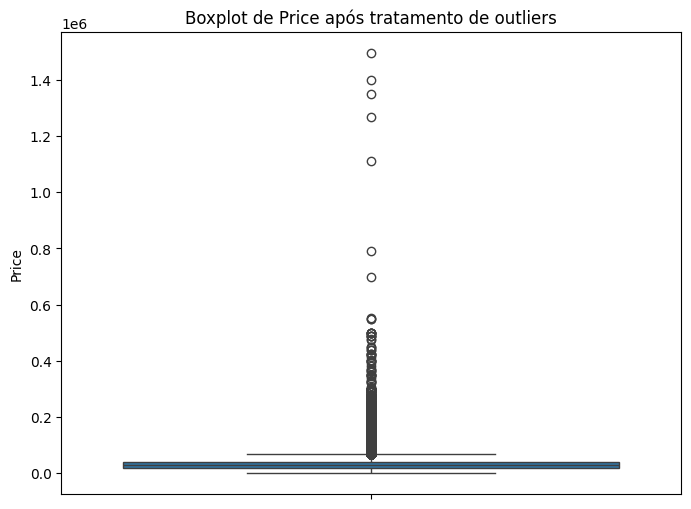

In [ ]:
# prompt: identifique os outliers da variável price em amostra_carros1_encoded

# Função para calcular o Z-score
def calcular_zscore(df, coluna):
  """
  Calcula o Z-score para uma coluna específica de um DataFrame.

  Args:
    df: O DataFrame de entrada.
    coluna: O nome da coluna para a qual calcular o Z-score.

  Returns:
    Uma série pandas contendo os Z-scores para a coluna especificada.
  """
  media = df[coluna].mean()
  desvio_padrao = df[coluna].std()
  zscores = (df[coluna] - media) / desvio_padrao
  return zscores

# Lidando com outliers usando Z-score na coluna 'price'
amostra_carros1_encoded = tratar_outliers_zscore(amostra_carros1_encoded, 'price')

# Após tratar outliers, é recomendado reavaliar as estatísticas descritivas, visualizações
# e correlação dos dados para confirmar a efetividade do método e se há necessidade de novas medidas.

# Exemplo de reavaliação
print(amostra_carros1_encoded.describe()) # Estatísticas descritivas

# Criar o boxplot para a coluna 'price' após o tratamento
plt.figure(figsize=(8, 6))
sns.boxplot(y='price', data=amostra_carros1_encoded)
plt.title('Boxplot de Price após tratamento de outliers')
plt.ylabel('Price')
plt.show()

#Normalização dos Dados

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crie uma cópia do DataFrame
amostra_carros1_MinMaxScale = amostra_carros1_encoded.copy()

# Selecione as colunas numéricas para normalização
numeric_cols = amostra_carros1_MinMaxScale.select_dtypes(include=['int64', 'float64'])

# Inicialize o MinMaxScaler
scaler = MinMaxScaler()

# Aplique a normalização MinMax às colunas numéricas
amostra_carros1_MinMaxScale[numeric_cols.columns] = scaler.fit_transform(numeric_cols)

# Exiba o DataFrame com os dados normalizados pelo MinMaxScaler
amostra_carros1_MinMaxScale

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
7532,0.047052,0.001981,0.777778,0.257652,0.108860,1.000000,0.961340,0.558013,0.507042,0.196342,0.432766,1.0,1.0,1.0,0.000748,0.896552,0.454545,0.129032,0.234987,0.019225
336281,0.029788,0.001602,0.944444,0.026830,0.053192,0.000000,0.043380,0.442385,0.464789,0.196342,0.432766,0.0,1.0,1.0,0.001159,0.709705,0.657592,0.000000,0.690862,0.021232
266023,0.077559,0.001794,0.722222,0.241008,0.100427,0.515042,0.480392,0.558013,0.492958,0.068656,0.544434,0.0,0.0,1.0,0.000908,0.931034,0.818182,0.442396,0.013055,0.013441
224994,0.077559,0.001298,0.500000,0.858907,0.028135,1.000000,0.607696,0.076304,0.253521,0.068656,0.432766,0.0,0.0,1.0,0.000944,0.709705,0.545455,0.032258,0.130548,0.011195
132622,0.066732,0.003039,0.777778,0.140100,0.096300,1.000000,0.043380,0.558013,0.464789,1.000000,1.000000,1.0,0.0,0.0,0.000878,0.586207,0.454545,0.271889,0.237448,0.023241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445095,0.018148,0.000460,0.833333,0.224972,0.037830,0.000000,0.043380,0.558013,0.859155,1.000000,1.000000,0.0,1.0,1.0,0.000784,0.620690,0.636364,0.069124,0.060574,0.010605
407970,0.067141,0.001269,0.611111,0.758693,0.055947,1.000000,0.607696,0.558013,0.591549,0.107923,1.000000,0.0,1.0,1.0,0.000528,0.827586,0.454545,0.430876,0.104439,0.007520
263449,0.077559,0.002769,0.777778,0.536561,0.105391,1.000000,0.480392,0.558013,0.422535,0.255393,0.432766,0.0,0.0,0.0,0.001187,1.000000,0.727273,0.011521,0.561358,0.012203
34845,0.101263,0.002589,0.666667,0.196418,0.089069,1.000000,0.961340,0.558013,0.605634,1.000000,1.000000,0.0,0.0,1.0,0.001073,0.709705,0.818182,0.094470,0.010705,0.016551


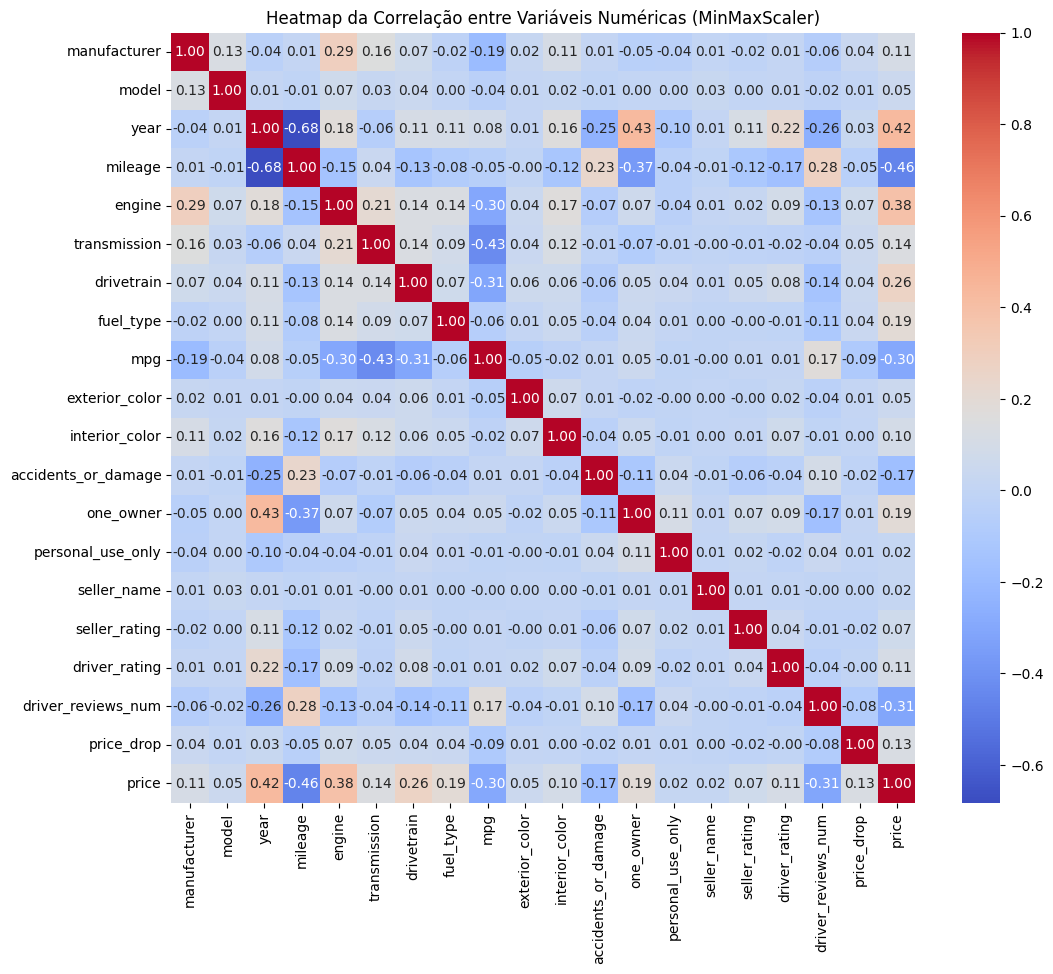

In [ ]:
# Selecionar apenas as colunas numéricas
numeric_cols = amostra_carros1_MinMaxScale.select_dtypes(include=['int64', 'float64'])

# Calcular a correlação de Pearson
correlation_matrix = numeric_cols.corr()

# Criar o heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap da Correlação entre Variáveis Numéricas (MinMaxScaler)')
plt.show()

# Random Forest

In [ ]:
# prompt: Vamos utlizar o Modelo de regressão Random Forest no memonto , lembre-se de: Criar uma cópia do data frame de amostra_carros1_MinMaxScale apelidando de X_RandomForest, e definir as features e o target (price).
# Além disso divida os dados em 70% treino e 30% teste, faça as previsões e calcule (e imprima) as métricas: mae, mse, e rmse

# Crie uma cópia do DataFrame
X_RandomForest = amostra_carros1_MinMaxScale.copy()

# Defina as features (X) e o target (y)
X = X_RandomForest.drop('price', axis=1)
y = X_RandomForest['price']

# Divida os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicialize e treine o modelo RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Faça as previsões
y_pred = model.predict(X_test)

# Calcule as métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

# Imprima as métricas
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 0.0018861487475353184
MSE: 1.9789809862751e-05
RMSE: 0.004448573913373925


In [ ]:
# Visualize os dados de treino e teste
print("\nTrain data:")
print(X_train.head())
print(y_train.head())
print("\nTest data:")
print(X_test.head())
print(y_test.head())


Train data:
        manufacturer     model      year   mileage    engine  transmission  \
527106      0.159985  0.002442  0.944444  0.110383  0.104649           1.0   
246545      0.077559  0.002468  0.777778  0.055229  0.117981           1.0   
130108      0.066732  0.004111  0.722222  0.587124  0.103333           1.0   
724329      0.060256  0.003281  0.666667  0.538995  0.147354           1.0   
498415      0.021247  0.001412  0.833333  0.529312  0.070657           1.0   

        drivetrain  fuel_type       mpg  exterior_color  interior_color  \
527106    0.961340   0.558013  0.422535        0.068656        0.432766   
246545    0.607696   0.558013  0.436620        1.000000        0.544434   
130108    0.607696   0.076304  0.422535        0.196342        1.000000   
724329    0.607696   0.558013  0.239437        1.000000        1.000000   
498415    0.043380   0.558013  0.676056        0.068656        1.000000   

        accidents_or_damage  one_owner  personal_use_only  seller_n

In [ ]:
# Crie uma cópia do DataFrame sem aplicar a normalização
X_RandomForest_original = amostra_carros1_encoded.copy()

# Defina as features (X) e o target (y)
X_original = X_RandomForest_original.drop('price', axis=1)
y_original = X_RandomForest_original['price']

# Divida os dados em treino e teste
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X_original, y_original, test_size=0.3, random_state=42
)

# Inicialize e treine o modelo RandomForestRegressor
model_original = RandomForestRegressor(random_state=42)
model_original.fit(X_train_original, y_train_original)

# Faça as previsões
y_pred_original = model_original.predict(X_test_original)

# Calcule as métricas
mae_original = mean_absolute_error(y_test_original, y_pred_original)
mse_original = mean_squared_error(y_test_original, y_pred_original)
rmse_original = math.sqrt(mse_original)

# Imprima as métricas
print(f"MAE (Original): {mae_original}")
print(f"MSE (Original): {mse_original}")
print(f"RMSE (Original): {rmse_original}")

MAE (Original): 2817.808745924983
MSE (Original): 44258235.62378965
RMSE (Original): 6652.686346415984
